In [1]:
import json
import pandas as pd
import os
from vega import VegaLite

pd.set_option('display.max_rows', 10)
#pd.set_option('display.max_columns', 10)

benchmark_dir = "../../benchmarks"

def load_input_table(fname):
    with open(os.path.join(benchmark_dir, fname), "r") as f:
        benchmark = json.load(f)
        input_data = benchmark["input_data"]
        df = pd.DataFrame.from_records(input_data)
        return df

def wrap_vl_json(spec, df):
    data = df.to_json(orient='records')
    spec["data"] = {"values": json.loads(data)}
    return spec

Quarter  Number of Units  Actual Profits
0  Quarter1               23            3358
1  Quarter2               27            3829
2  Quarter3               15            2374
3  Quarter4               43            3373

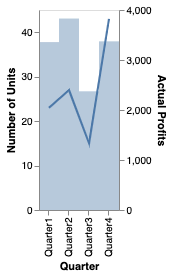

In [2]:
df1 = load_input_table("001.json")
#df = pd.melt(df, id_vars='Quarter', value_vars=["Actual Profits", "No. of Units"])

display(df1)

chart = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": {"type": "line"},
            "encoding": {
                "y": {"field": "Number of Units", "type": "quantitative"},
                "x": { "field": "Quarter", "type": "nominal" }
            }
        }, 
        {
            "mark": {"opacity": 0.4, "type": "bar"},
            "encoding": {
                "y": {"type": "quantitative", "field": "Actual Profits"},
                "x": { "field": "Quarter", "type": "nominal" }
            }
        }
  ],
  "resolve": {"scale": {"y": "independent"}}
}

VegaLite(chart, df1)

Month    variable  value
0   Apr-15  Low (<50%}   50.0
1   May-15  Low (<50%}   50.0
2   Jun-15  Low (<50%}   50.0
3   Jul-15  Low (<50%}   50.0
4   Aug-15  Low (<50%}   50.0
..     ...         ...    ...
55  Nov-15        West   88.3
56  Dec-15        West   75.5
57  Jan-16        West   72.1
58  Feb-16        West   93.1
59  Mar-16        West   95.7

[60 rows x 3 columns]

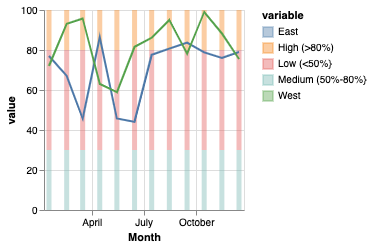

In [3]:
df2 = load_input_table("002.json")

df2 = pd.melt(df2, id_vars='Month', value_vars=["Low (<50%}", "Medium (50%-80%}", "High (>80%)", "East", "West"])

display(df2)
#print(df2.to_json(orient="records"))

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": {"opacity": 0.4, "type": "bar"},
            "transform": [{"filter": "datum.variable != \"East\" && datum.variable != \"West\""}],
            "encoding": {
                "color": {"field": "variable", "type": "nominal"},
                "y": {"field": "value", "type": "quantitative"},
                "x": { "field": "Month", "type": "temporal" }
            }
        }, 
        {
            "mark": {"type": "line", "stroke": "red"},
            "transform": [{"filter": "datum.variable == \"East\" || datum.variable == \"West\""}],
            "encoding": {
                "color": {"field": "variable", "type": "nominal"},
                "y": {"field": "value", "type": "quantitative"},
                "x": { "field": "Month", "type": "temporal" }
            }
        }
  ]
}

#print(json.dumps(vl_spec, indent=4))

VegaLite(vl_spec, df2)

Net Cash Flow  Month  Net Cash Flow Sum       c
0           80000  Start              80000       0
1           -5003    Apr              74997   80000
2          -16700    May              58297   74997
3           48802    Jun             107099   58297
4          -11198    Jul              95901  107099
..            ...    ...                ...     ...
8           43250    Nov              98271   55021
9          -18280    Dec              79991   98271
10          26670    Jan             106661   79991
11          15000    Feb             121661  106661
12          24750    Mar             146411  121661

[13 rows x 4 columns]

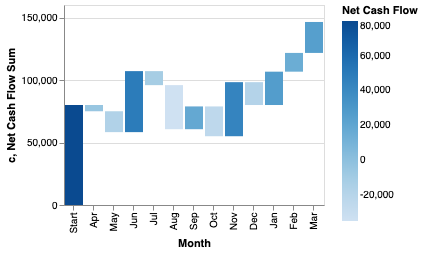

In [4]:
df3 = load_input_table("003.json")

df3_1 = df3["Net Cash Flow"].cumsum()
df3 = df3.join(df3_1, lsuffix='', rsuffix=' Sum')
df3 = df3.assign(c=df3["Net Cash Flow Sum"]-df3["Net Cash Flow"])
#df3 = df3.assign(d=df3["c"]>df3["Net Cash Flow Sum"])
#print(df3.to_json(orient="records"))

display(df3)

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "x": {"field": "Month", "type": "nominal", "sort": "none"},
        "y2": {
          "field": "Net Cash Flow Sum",
          "type": "quantitative"    
        },
        "y": {"field": "c", "type": "quantitative"},
        "color": {"field": "Net Cash Flow", "type": "quantitative"}
    }
}

VegaLite(vl_spec, df3)

Age Group     variable  value  gender  year
0      00-04  Female-1986   8243  Female  1986
1      05-09  Female-1986   8440  Female  1986
2      10-14  Female-1986   8659  Female  1986
3      15-19  Female-1986   8588  Female  1986
4      20-24  Female-1986   7930  Female  1986
..       ...          ...    ...     ...   ...
63     60-64    Male-2050   7315    Male  2050
64     65-69    Male-2050   6712    Male  2050
65     70-74    Male-2050   5621    Male  2050
66     75-79    Male-2050   4176    Male  2050
67     80-00    Male-2050   4876    Male  2050

[68 rows x 5 columns]

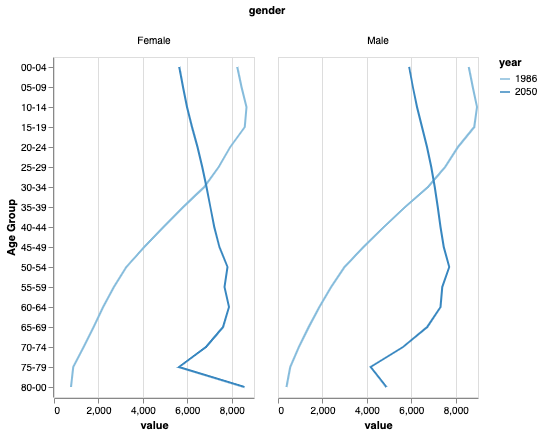

In [5]:
df4 = load_input_table("004.json")

df4 = pd.melt(df4, id_vars='Age Group', value_vars=["Female-1986", "Female-2050", "Male-1986", "Male-2050"])

split_col = df4["variable"].str.split("-", expand=True)
df4["gender"] = split_col[0]
df4["year"] = split_col[1]

display(df4)

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "line",
    "encoding": {
        "y": {"field": "Age Group", "type": "nominal", "sort": None},
        "x": {
          "field": "value",
          "type": "quantitative"    
        },
        "column": {"field": "gender", "type": "nominal"},
        "color": {"field": "year","type": "ordinal"}
    }
}

VegaLite(vl_spec, df4)

Month variable  value
0    Jan     Cost    6.0
1    Feb     Cost   15.0
2    Mar     Cost   24.0
3    Apr     Cost   33.0
4    May     Cost   42.0
..   ...      ...    ...
19   Feb    Sales   20.0
20   Mar    Sales   30.0
21   Apr    Sales   40.0
22   May    Sales   50.0
23   Jun    Sales   60.0

[24 rows x 3 columns]

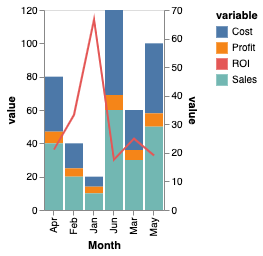

In [6]:
df5 = load_input_table("005.json")

df5 = pd.melt(df5, id_vars='Month', value_vars=["Cost", "Profit", "ROI", "Sales"])

display(df5)
#print(df5.to_json(orient="records"))

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": {"type": "bar"},
            "transform": [{"filter": "datum.variable != \"ROI\""}],
            "encoding": {
                "x": { "field": "Month", "type": "nominal" },
                "color": {"field": "variable", "type": "nominal"},
                "y": {"field": "value", "type": "quantitative"}
            }
        },
        {
            "mark": {"type": "line", "stroke": "red"},
            "transform": [{"filter": "datum.variable == \"ROI\""}],
            "encoding": {
                "x": { "field": "Month", "type": "nominal" },
                "color": {"field": "variable", "type": "nominal"},
                "y": {"field": "value", "type": "quantitative"}
            }
        }
  ],
  "resolve": {"scale": {"y": "independent"}}
}

#print(json.dumps(vl_spec, indent=4))

VegaLite(vl_spec, df5)

Bucket  variable  value
0  Bucket E    Actual    115
1  Bucket D    Actual     90
2  Bucket C    Actual    115
3  Bucket B    Actual    140
4  Bucket A    Actual    150
5  Bucket E  Budgeted    100
6  Bucket D  Budgeted    100
7  Bucket C  Budgeted    125
8  Bucket B  Budgeted    125
9  Bucket A  Budgeted    140

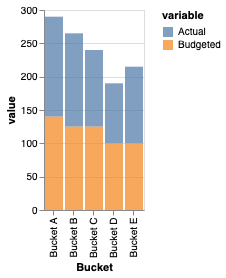

In [7]:
df6 = load_input_table("006.json")

df6 = pd.melt(df6, id_vars='Bucket', value_vars=["Actual", "Budgeted"])

display(df6)
#print(df6.to_json(orient="records"))

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"type": "bar", "opacity":0.7},
    "encoding": {
        "color": {"field": "variable", "type": "nominal"},
        "y": {"field": "value", "type": "quantitative"},
        "x": { "field": "Bucket", "type": "nominal" },
    }
}

VegaLite(vl_spec, df6)

id           variable  value
0    0  Strongly Disagree    7.0
1    1  Strongly Disagree   10.0
2    2  Strongly Disagree   10.0
3    0              Agree   35.0
4    1              Agree   10.0
..  ..                ...    ...
7    1           Disagree   10.0
8    2           Disagree   15.0
9    0     Strongly Agree   50.0
10   1     Strongly Agree   70.0
11   2     Strongly Agree   45.0

[12 rows x 3 columns]

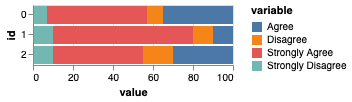

In [8]:
df7 = load_input_table("007.json")

df7['id'] = df7.index
df7 = pd.melt(df7, id_vars='id', value_vars=["Strongly Disagree", "Agree", "Disagree", "Strongly Agree"])

display(df7)
#print(json.dumps(df7.to_dict(orient="records")))

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"type": "bar"},
    "encoding": {
        "color": {"field": "variable", "type": "nominal"},
        "y": {"field": "id", "type": "nominal"},
        "x": { "field": "value", "type": "quantitative"}    
    }
}

VegaLite(vl_spec, df7)

Value variable  lower range  means  stddev  upper range
0           Y1         0.39   0.52  0.1328         0.66
1           Y2         0.44   0.57  0.1321         0.70
2           Y3         0.47   0.60  0.1303         0.73
3           Y4         0.50   0.63  0.1266         0.75
4           Y5         0.51   0.63  0.1225         0.75

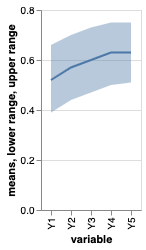

In [9]:
df8 = load_input_table("008.json")

# gather(dat, "col1", "col2", -Value) %>% spread(Value, col2)
df8 = pd.melt(df8, id_vars='Value', value_vars=["Y1", "Y2", "Y3", "Y4", "Y5"])
df8 = df8.pivot(index='variable',columns='Value', values='value').reset_index()

display(df8)
#print(json.dumps(df8.to_dict(orient="records")))


vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": "line",
            "encoding": {
                "x": { "field": "variable", "type": "nominal" },
                "y": {"field": "means", "type": "quantitative"}
            }
        }, 
        {
            "mark": {"opacity": 0.4, "type": "area"},
            "encoding": {
                "x": { "field": "variable", "type": "nominal" },
                "y": {"type": "quantitative", "field": "lower range"},
                "y2": {"type": "quantitative", "field": "upper range"}
            }
        }
  ]
}

VegaLite(vl_spec, df8)

Rae       Location variable  American Indian or Alaska Native  Asian  \
0          Arizona     2009                              30.6   15.0   
1          Arizona     2010                              30.8   12.1   
2          Arizona     2011                              27.5   15.1   
3          Arizona     2012                              29.3   16.2   
4          Arizona     2013                              26.9   15.1   
..             ...      ...                               ...    ...   
13   United States     2010                              29.2   15.7   
14   United States     2011                              27.6   15.4   
15   United States     2012                              27.4   15.0   
16   United States     2013                              26.9   14.6   
17   United States     2014                              23.1   10.6   

Rae  Black or African American  Hispanic or Latino  \
0                         15.9                27.9   
1                         15.3                27.4   
2                         18.2                27.8   
3                         16.2                28.3   
4                         17.4                27.5   
..                         ...                 ...   
13                        18.2                30.9   
14                        17.7                29.8   
15                        17.3                29.0   
16                        17.1                28.4   
17                        13.6                23.5   

Rae  Native Hawaiian or Pacific Islander  Other Race  Two or more races  \
0                                   25.5        23.7               14.3   
1                                   11.9        27.1               14.7   
2                                   30.2        28.4               18.2   
3                                   16.6        31.0               16.5   
4                                   21.3        30.1               15.2   
..                                   ...         ...                ...   
13                                  17.4        34.6               14.9   
14                                  18.5        33.6               14.4   
15                                  18.0        32.3               14.0   
16                                  17.9        31.7               13.2   
17                                  13.5        26.1               10.4   

Rae  White  White,not Hispanic or Latino  
0     16.3                          11.1  
1     15.6                          10.9  
2     15.7                          10.9  
3     16.0                          11.3  
4     15.7                          11.2  
..     ...                           ...  
13    13.7                          10.9  
14    13.4                          10.7  
15    13.1                          10.4  
16    12.9                          10.2  
17    10.4                           8.1  

[18 rows x 11 columns]

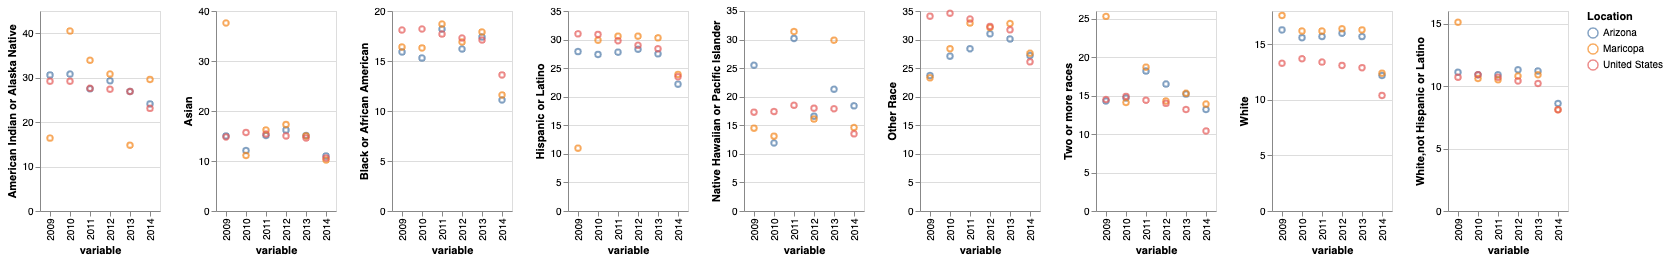

In [10]:
df9 = load_input_table("009.json")
df9 = pd.melt(df9, id_vars=['Location', 'Rae'], value_vars=["2009", "2010", "2011", "2012", "2013", "2014"])
df9 = df9.pivot_table(index=["Location", "variable"], columns='Rae', values='value').reset_index()

display(df9)
#print(json.dumps(df9.to_dict(orient="records")))


VegaLite({
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "repeat": ["American Indian or Alaska Native", "Asian", "Black or African American", 
               "Hispanic or Latino", "Native Hawaiian or Pacific Islander", "Other Race",
               "Two or more races", "White", "White,not Hispanic or Latino"],
    "columns": 10,
  "spec": {
    "encoding": {
        "x": { "field": "variable", "type": "nominal" }
    },
    "layer": [
        {
            "mark": "point",
            "encoding": {
                "y": {"field": {"repeat": "repeat"}, "type": "quantitative"},
                "color": {"field": "Location", "type": "nominal"}
            }
        }
    ]
  }
}, df9)

Location                                  Rae variable  value
0    United States                                White     2009   13.3
1    United States            Black or African American     2009   18.1
2    United States     American Indian or Alaska Native     2009   29.2
3    United States                                Asian     2009   14.8
4    United States  Native Hawaiian or Pacific Islander     2009   17.3
..             ...                                  ...      ...    ...
157       Maricopa  Native Hawaiian or Pacific Islander     2014   14.6
158       Maricopa                           Other Race     2014   27.6
159       Maricopa                    Two or more races     2014   13.9
160       Maricopa         White,not Hispanic or Latino     2014    8.1
161       Maricopa                   Hispanic or Latino     2014   23.9

[162 rows x 4 columns]

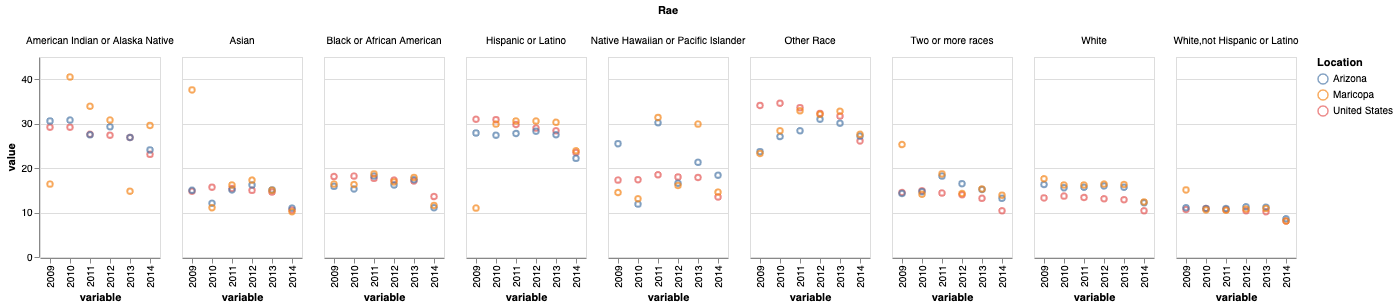

In [11]:
df9 = load_input_table("009.json")
df9 = pd.melt(df9, id_vars=['Location', 'Rae'], value_vars=["2009", "2010", "2011", "2012", "2013", "2014"])

display(df9)
#print(json.dumps(df9.to_dict(orient="records")))

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "point",
    "encoding": {
        "x": { "field": "variable", "type": "nominal" },
        "y": {"field": "value", "type": "quantitative"},
        "color": {"field": "Location", "type": "nominal"},
        "column": {"field": "Rae", "type": "nominal"}
    }
}

VegaLite(vl_spec, df9)

Class variable  value
0  Literacy     Fall     34
1  Language     Fall     63
2      Math     Fall     67
3   Science     Fall     92
4      Arts     Fall     96
5  Literacy   Spring     69
6  Language   Spring     77
7      Math   Spring     75
8   Science   Spring     98
9      Arts   Spring    100

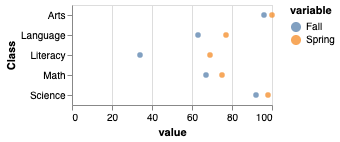

In [12]:
df10 = load_input_table("010.json")
df10 = pd.melt(df10, id_vars="Class", value_vars=['Fall', 'Spring'])

display(df10)

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "circle",
    "encoding": {
        "y": {"field": "Class", "type": "nominal"},
        "x": { "field": "value", "type": "quantitative" },
        "color": {"field": "variable", "type": "nominal"}
    }

}

VegaLite(vl_spec, df10)

C1        C2 variable  value
0   Q1  Targeted     EMEA     66
1   Q1   Engaged     EMEA     65
2   Q1   Pitched     EMEA     59
3   Q1   Adopted     EMEA     52
4   Q2  Targeted     EMEA     56
..  ..       ...      ...    ...
43  Q2   Adopted     APAC     27
44  Q3  Targeted     APAC     87
45  Q3   Engaged     APAC     75
46  Q3   Pitched     APAC     74
47  Q3   Adopted     APAC     59

[48 rows x 4 columns]

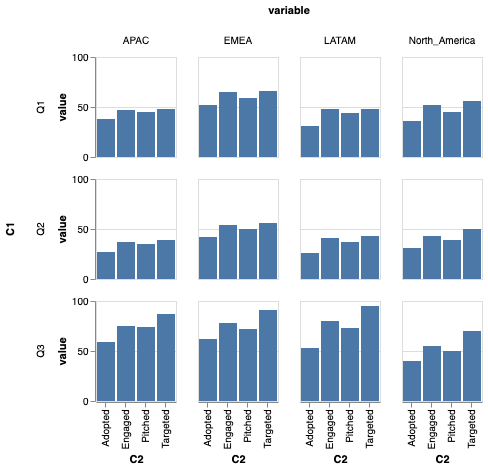

In [13]:
df11 = load_input_table("011.json")
df11 = pd.melt(df11, id_vars=["C1", "C2"], value_vars=["EMEA", "LATAM", "North_America", "APAC"])

display(df11)
#print(json.dumps(df11.to_dict(orient="records")))

vl_spec = {
    "height": 100,
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "y": {"field": "value", "type": "quantitative"},
        "x": { "field": "C2", "type": "nominal" },
        "column": {"field": "variable", "type": "nominal"},
        "row": {"field": "C1", "type": "nominal"}
    }
}

#print(json.dumps(vl_spec, indent=4))

VegaLite(vl_spec, df11)

C1        C2 variable  value
0   Q1  Targeted     EMEA     66
1   Q1   Engaged     EMEA     65
2   Q1   Pitched     EMEA     59
3   Q1   Adopted     EMEA     52
4   Q2  Targeted     EMEA     56
..  ..       ...      ...    ...
43  Q2   Adopted     APAC     27
44  Q3  Targeted     APAC     87
45  Q3   Engaged     APAC     75
46  Q3   Pitched     APAC     74
47  Q3   Adopted     APAC     59

[48 rows x 4 columns]

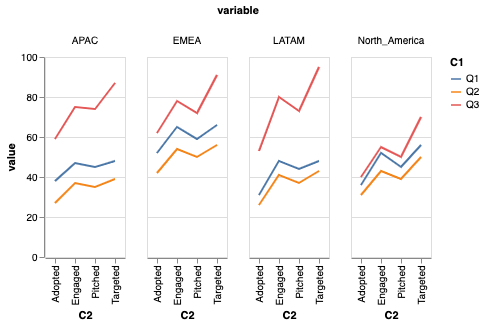

In [14]:
df12 = load_input_table("012.json")
df12 = pd.melt(df12, id_vars=["C1", "C2"], value_vars=["EMEA", "LATAM", "North_America", "APAC"])

display(df12)
#print(json.dumps(df12.to_dict(orient="records")))

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "line",
    "encoding": {
        "y": {"field": "value", "type": "quantitative"},
        "x": { "field": "C2", "type": "nominal" },
        "column": {"field": "variable", "type": "nominal"},
        "color": {"field": "C1", "type": "nominal"}
    }
}

#print(json.dumps(vl_spec, indent=4))

VegaLite(vl_spec, df12)

#print(json.dumps(wrap_vl_json(vl_spec, df12)))

Totals Value variable  value  cumsum
0        7     A    alpha      2       2
1        8     B    alpha      2       2
2        9     C    alpha      3       3
3        9     D    alpha      3       3
4        9     E    alpha      4       4
..     ...   ...      ...    ...     ...
10       7     A    gamma      3       7
11       8     B    gamma      3       8
12       9     C    gamma      3       9
13       9     D    gamma      2       9
14       9     E    gamma      2       9

[15 rows x 5 columns]

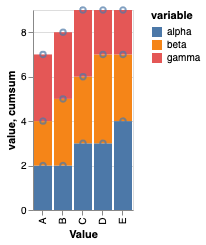

In [15]:
df13 = load_input_table("013.json")

df13 = pd.melt(df13, id_vars=["Totals", "Value"], value_vars=["alpha", "beta", "gamma"])
df13['cumsum'] = df13.groupby("Value")['value'].transform(pd.Series.cumsum)

display(df13)
#print(df13)

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [{
        "mark": "bar",
        "encoding": {
            "x": { "field": "Value", "type": "nominal" },
            "y": { "field": "value", "type": "quantitative"},
            "color": {"field": "variable", "type": "nominal"},
            "order": {"field": "variable", "type": "quantitative", "sort": "ascending"}
        }
    },  {
      "mark": "point",
      "encoding": {
        "x": { "field": "Value", "type": "nominal" },
        "y": { "field": "cumsum", "type": "quantitative"},
        "text": {"field": "value", "type": "quantitative"}
      }
    }]
}

#print(json.dumps(vl_spec, indent=4))

VegaLite(vl_spec, df13)

Shift  Period Start of Shift End of Shift  Duration    s1   s0
0       1       1      50 / 1150   110 / 1090        60   110   50
1       2       1      224 / 976    272 / 928        48   272  224
2       3       1      379 / 821    419 / 781        40   419  379
3       4       1      545 / 655    601 / 599        56   601  545
4       5       1      759 / 441    840 / 360        81   840  759
..    ...     ...            ...          ...       ...   ...  ...
15     16       3      325 / 875    376 / 824        51   376  325
16     17       3      541 / 659    564 / 636        23   564  541
17     18       3      684 / 516    694 / 506        10   694  684
18     19       3      695 / 505    775 / 425        80   775  695
19     20       3      987 / 213     1200 / 0       213  1200  987

[20 rows x 7 columns]

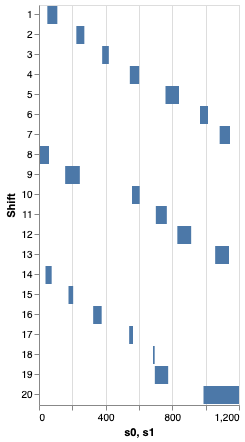

In [16]:
df14 = load_input_table("014.json")

split_col = df14["End of Shift"].str.split("/", expand=True)
df14["s1"] = [int(x) for x in split_col[0]]
split_col = df14["Start of Shift"].str.split("/", expand=True)
df14["s0"] = [int(x) for x in split_col[0]]

display(df14)
#print(json.dumps(df14.to_dict(orient="records")))

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "x": { "field": "s0", "type": "quantitative"},
        "x2": { "field": "s1", "type": "quantitative"},
        "y": { "field": "Shift", "type": "nominal"}
    }
}

#print(json.dumps(vl_spec, indent=4))

VegaLite(vl_spec, df14)

Shift  Period Start of Shift End of Shift  Duration    s1   s0
0       1       1      50 / 1150   110 / 1090        60   110   50
1       2       1      224 / 976    272 / 928        48   272  224
2       3       1      379 / 821    419 / 781        40   419  379
3       4       1      545 / 655    601 / 599        56   601  545
4       5       1      759 / 441    840 / 360        81   840  759
..    ...     ...            ...          ...       ...   ...  ...
15     16       3      325 / 875    376 / 824        51   376  325
16     17       3      541 / 659    564 / 636        23   564  541
17     18       3      684 / 516    694 / 506        10   694  684
18     19       3      695 / 505    775 / 425        80   775  695
19     20       3      987 / 213     1200 / 0       213  1200  987

[20 rows x 7 columns]

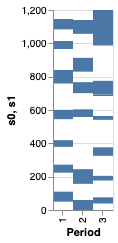

In [17]:
df15 = load_input_table("015.json")

split_col = df15["End of Shift"].str.split("/", expand=True)
df15["s1"] =  [int(x) for x in split_col[0]]
split_col = df15["Start of Shift"].str.split("/", expand=True)
df15["s0"] =  [int(x) for x in split_col[0]]

display(df15)
#print(json.dumps(df15.to_dict(orient="records")))

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "rect",
    "encoding": {
        "y": { "field": "s0", "type": "quantitative"},
        "x": { "field": "Period", "type": "nominal"},
        "y2": { "field": "s1", "type": "quantitative"},
    }
}

#print(json.dumps(vl_spec, indent=4))

VegaLite(vl_spec, df15)

Year  Amount  Year Label Revenue  Variance Variance %       c
0  2011  773000        2011   $773K     39000        +5%  812000
1  2012  812000        2012   $812K   -445000       -55%  367000
2  2013  367000        2013   $367K    117000       +32%  484000
3  2014  484000        2014   $484K    278000       +57%  762000
4  2015  762000        2015   $762K   -201000       -26%  561000
5  2016  561000        2016   $561K    213000       +38%  774000
6  2017  774000        2017   $774K     14500             788500

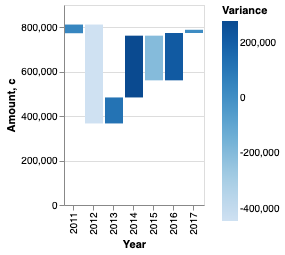

In [18]:
df16 = load_input_table("016.json")

df16["c"] = df16["Amount"] + df16["Variance"]

display(df16)
#print(json.dumps(df16.to_dict(orient="records")))

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "x": { "field": "Year", "type": "nominal"},
        "y": { "field": "Amount", "type": "quantitative"},
        "y2": { "field": "c", "type": "quantitative"},
        "color": {"field": "Variance", "type": "quantitative"}
    }
}

#print(json.dumps(vl_spec, indent=4))

VegaLite(vl_spec, df16)

Year   variable  value
0   2001     Actual   1000
1   2002     Actual   1050
2   2003     Actual   1110
3   2004     Actual   1180
4   2005     Actual   1260
..   ...        ...    ...
37  2017  Projected      0
38  2018  Projected   3210
39  2025  Projected   4960
40  2030  Projected   6510
41  2040  Projected  10360

[42 rows x 3 columns]

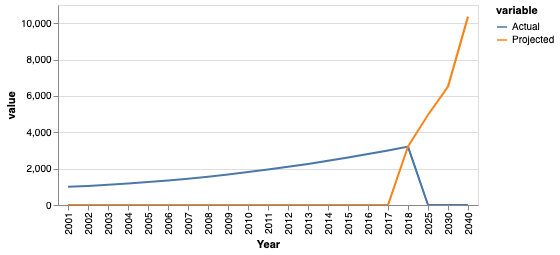

In [19]:
df17 = load_input_table("017.json")

df17 = pd.melt(df17, id_vars=["Year"], value_vars=["Actual", "Projected"])

display(df17)
#print(json.dumps(df17.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "line",
    "encoding": {
        "x": { "field": "Year", "type": "nominal"},
        "y": { "field": "value", "type": "quantitative"},
        "color": { "field": "variable", "type": "nominal"}
}}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df17)

Item variable  value
0   Desktop Computers     2012     20
1             Laptops     2012     34
2            Monitors     2012     12
3            Printers     2012     78
4   Desktop Computers     2013     12
..                ...      ...    ...
11           Printers     2014     90
12  Desktop Computers     2015     12
13            Laptops     2015     39
14           Monitors     2015     15
15           Printers     2015     14

[16 rows x 3 columns]

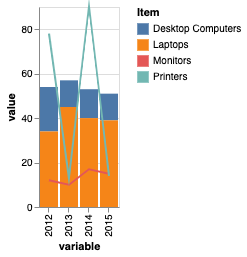

In [20]:
df18 = load_input_table("018.json")

df18 = pd.melt(df18, id_vars='Item', value_vars=["2012", "2013", "2014", "2015"])

display(df18)
#print(json.dumps(df18.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [{
        "mark": "bar",
        "transform": [{"filter": "datum.Item == \"Desktop Computers\" || datum.Item == \"Laptops\""}],
        "encoding": {
            "x": { "field": "variable", "type": "nominal"},
            "y": { "field": "value", "type": "quantitative"},
            "color": {"field": "Item", "type": "nominal"},
        }},{
        "mark": {"type": "line"},
        "transform": [{"filter": "datum.Item != \"Desktop Computers\" && datum.Item != \"Laptops\""}],
        "encoding": {
            "x": { "field": "variable", "type": "nominal"},
            "y": { "field": "value", "type": "quantitative"},
            "color": {"field": "Item", "type": "nominal"},
        }
    }]
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df18)

cuts  Customer ID  Duration  Purchase Amount  Representative  csum
0      (0,10]          533       533              533             533   533
1     (10,20]            0         0                0               0   533
2     (20,30]            0         0                0               0   533
3     (30,40]            0         0                0               0   533
4     (40,50]           72        72               72              72   605
..        ...          ...       ...              ...             ...   ...
15  (150,160]          142       142              142             142  1992
16  (160,170]          136       136              136             136  2128
17  (170,180]          136       136              136             136  2264
18  (180,190]          130       130              130             130  2394
19  (190,200]          153       153              153             153  2547

[20 rows x 6 columns]

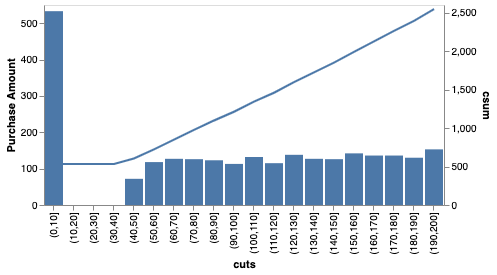

In [21]:
df19 = load_input_table("019.json")

df19["cuts"] = pd.cut(df19['Purchase Amount'], 20, precision=0)
df19 = df19.groupby(['cuts']).count().reset_index()
df19["csum"] = df19["Purchase Amount"].cumsum()
df19["cuts"] = [str("({},{}]".format(int(x.left), int(x.right))) for x in df19["cuts"]]

display(df19)
#print(json.dumps(df19.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [{
        "mark": "bar",
        "encoding": {
            "x": { "field": "cuts", "type": "ordinal", "sort": "none"},
            "y": { "field": "Purchase Amount", "type": "quantitative"},
        }
    },{
        "mark": "line",
        "encoding": {
            "x": { "field": "cuts", "type": "ordinal", "sort": "none"},
            "y": { "field": "csum", "type": "quantitative"},
            "order": {"field": "id", "type": "ordinal"}
        }
    }],
    "resolve": {"scale": {"y": "independent"}}
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df19)

Product         Country  Amount
0    Apple       Australia   20634
1    Apple          Canada   24867
2    Apple          France   80193
3    Apple         Germany    9082
4    Apple     New Zealand   10332
..     ...             ...     ...
39  Orange          France    2256
40  Orange         Germany    8887
41  Orange     New Zealand   12010
42  Orange  United Kingdom   21744
43  Orange   United States   30932

[44 rows x 3 columns]

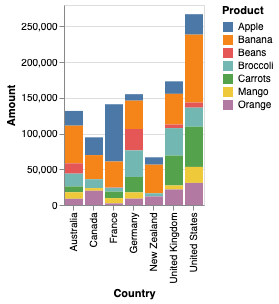

In [22]:
df20 = load_input_table("020.json")
df20 = df20.groupby(['Product', "Country"])["Amount"].sum().reset_index()

display(df20)
#print(json.dumps(df20.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "x": { "field": "Country", "type": "nominal"},
        "color": { "field": "Product", "type": "nominal"},
        "y": { "field": "Amount", "type": "quantitative"},
        #"column": { "field": "Country", "type": "nominal"},
        
    }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df20)

Country  Total Result variable  value
0        Australia         40492    Beans  14433
1           Canada         12407    Beans      0
2           France         15125    Beans    680
3          Germany         88738    Beans  29905
4      New Zealand          4390    Beans      0
..             ...           ...      ...    ...
18          France         15125  Carrots   9104
19         Germany         88738  Carrots  21636
20     New Zealand          4390  Carrots      0
21  United Kingdom         85351  Carrots  41815
22   United States         90162  Carrots  56284

[21 rows x 4 columns]

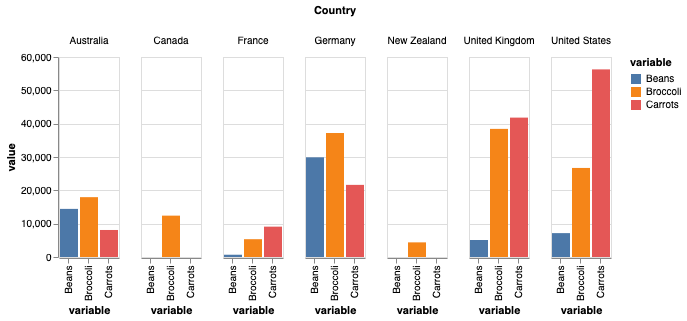

In [23]:
df21 = load_input_table("021.json")

df21 = pd.melt(df21, id_vars=['Country', "Total Result"], value_vars=["Beans", "Broccoli", "Carrots"])
df21 = df21[df21["Country"] != "Total Result"]

display(df21)
#print(json.dumps(df21.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "x": { "field": "variable", "type": "nominal"},
        "color": { "field": "variable", "type": "nominal"},
        "y": { "field": "value", "type": "quantitative"},
        "column": { "field": "Country", "type": "nominal"},
        
    }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df21)

#  Year  Coverage                       Event  Event_line
0    1  1995        81                                       0
1    2  1996        81                                       0
2    3  1997        81  Medicaid coverage for kids          81
3    4  1998        82                                       0
4    5  1999        81      Patient bill of rights          81
..  ..   ...       ...                         ...         ...
11  12  2006        83                                       0
12  13  2007        84                                       0
13  14  2008        83                                       0
14  15  2009        83                                       0
15  16  2010        82                                       0

[16 rows x 5 columns]

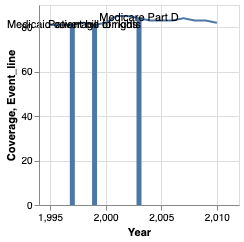

In [24]:
df22_discard = load_input_table("022_discard.json")

display(df22_discard)
#print(json.dumps(df22.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer":[{
        "mark": "line",
        "encoding": {
            "x": { "field": "Year", "type": "quantitative"},
            "y": { "field": "Coverage", "type": "quantitative"}
        }
    },{
        "mark": "bar",
        "encoding": {
            "x": { "field": "Year", "type": "quantitative"},
            "y": { "field": "Event_line", "type": "quantitative"}
        }
    },{
        "mark": "text",
        "encoding": {
            "x": { "field": "Year", "type": "quantitative"},
            "y": { "field": "Event_line", "type": "quantitative"},
            "text": { "field": "Event", "type": "nominal"},
        }
    }]
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df22_discard)

label variable  value
0   Category 1     2008     61
1   Category 2     2008    128
2   Category 3     2008     12
3   Category 4     2008     93
4   Category 5     2008     88
..         ...      ...    ...
31  Category 2     2013     47
32  Category 3     2013     82
33  Category 4     2013     13
34  Category 5     2013     23
35  Category 6     2013     83

[36 rows x 3 columns]

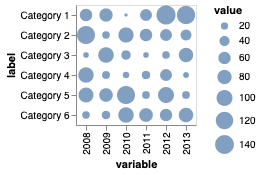

In [25]:
df22 = load_input_table("022.json")
# https://sites.google.com/site/e90e50fx/home/matrix-bubble-chart-with-excel
df22 = pd.melt(df22, id_vars='label', value_vars=["2008", "2009", "2010", "2011", "2012", "2013"])

display(df22)
#print(json.dumps(df22.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "circle",
    "encoding": {
        "x": { "field": "variable", "type": "nominal"},
        "size": { "field": "value", "type": "quantitative"},
        "y": { "field": "label", "type": "nominal"}
    }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df22)

data_ora      site      type  value day hour
0         6_0    e90e50  computer     22   6    0
1         6_0    e90e50    mobile      8   6    0
2         6_0  e90e50fx  computer     17   6    0
3         6_0  e90e50fx    mobile      5   6    0
4         6_1    e90e50  computer      8   6    1
...       ...       ...       ...    ...  ..  ...
1981    30_15    e90e50    mobile      9  30   15
1982    30_15  e90e50fx  computer      9  30   15
1983    30_15  e90e50fx    mobile      8  30   15
1984    30_16    e90e50  computer     21  30   16
1985    30_16    e90e50    mobile     14  30   16

[1986 rows x 6 columns]

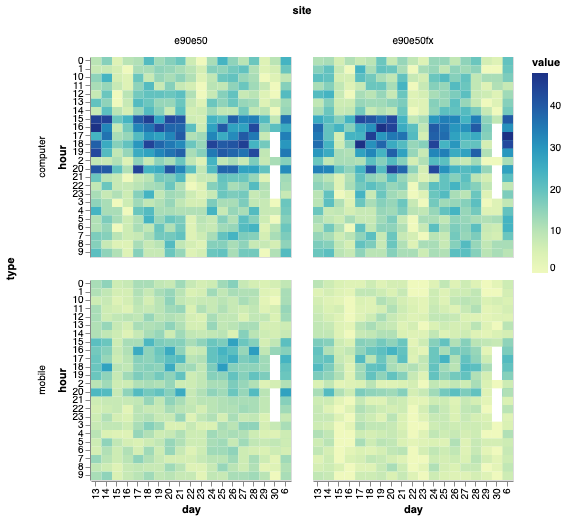

In [26]:
df23 = load_input_table("023.json")

split_col = df23["data_ora"].str.split("_", expand=True)
df23["day"] =  [str(x) for x in split_col[0]]
df23["hour"] =  [str(x) for x in split_col[1]]

display(df23)
#print(json.dumps(df23.to_dict(orient="records")))

spec = {
    "height": 200,
    "width": 200,
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "rect",
    "encoding": {
        "x": { "field": "day", "type": "nominal"},
        "color": { "field": "value", "type": "quantitative"},
        "y": { "field": "hour", "type": "nominal"},
        "column": { "field": "site", "type": "nominal"},
        "row": { "field": "type", "type": "nominal"}
    }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df23)

Parts  Start Date  Duration   End Date
0      Foundation   959842800    864000  960706800
1           Walls   960793200    604800  961398000
2            Roof   961484400    864000  962348400
3  Windows, Doors   962434800    432000  962866800
4        Plumbing   962953200    259200  963212400
5        Electric   962953200    259200  963212400
6        Painting   963298800    172800  963471600
7        Flooring   963471600    172800  963644400

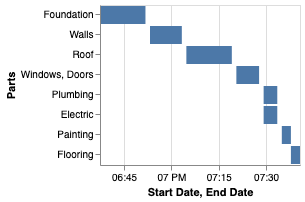

In [27]:
df24 = load_input_table("024.json")

df24["End Date"] = df24["Start Date"] + df24['Duration']

display(df24)
#print(json.dumps(df24.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "y": { "field": "Parts", "type": "nominal", "sort": "null"},
        "x": { "field": "Start Date", "type": "temporal"},
        "x2": { "field": "End Date", "type": "temporal"}
    }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df24)

Complaint Type  Count  cumsum
0          Too noisy     27      27
1         Overpriced    789     816
2  Food is tasteless     65     881
3     Food not fresh      9     890
4  Food is too salty     15     905
5          Not clean     30     935
6   Unfriendly staff     12     947
7          Wait time    109    1056
8      No atmosphere     45    1101
9     Small portions    621    1722

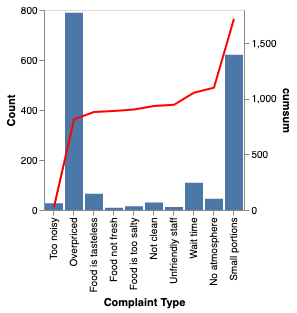

In [28]:
df25 = load_input_table("025.json")

#df25 = df25.sort_values(by='Count', ascending=False)
df25["cumsum"] = df25["Count"].cumsum()

display(df25)
#print(json.dumps(df25.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer":[{
        "mark": "bar",
        "encoding": {
            "x": { "field": "Complaint Type", "type": "nominal", "sort": None},
            "y": { "field": "Count", "type": "quantitative"}
        }
    },{
        "mark": {"type": "line", "color": "red"},
        "encoding": {
            "x": { "field": "Complaint Type", "type": "nominal", "sort": None},
            "y": { "field": "cumsum", "type": "quantitative"},
            "order": { "field": "id", "type": "ordinal"}
        }
    }],
  "resolve": {"scale": {"y": "independent"}}
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df25)

data_ora      site      type  value
0       06_00    e90e50  computer     22
1       06_00    e90e50    mobile      8
2       06_00  e90e50fx  computer     17
3       06_00  e90e50fx    mobile      5
4       06_01    e90e50  computer      8
...       ...       ...       ...    ...
1981    30_15    e90e50    mobile      9
1982    30_15  e90e50fx  computer      9
1983    30_15  e90e50fx    mobile      8
1984    30_16    e90e50  computer     21
1985    30_16    e90e50    mobile     14

[1986 rows x 4 columns]

day hour  value
0    06   00    155
1    06   01    149
2    06   02    156
3    06   03    149
4    06   04    139
..   ..  ...    ...
444  30   12     13
445  30   13     18
446  30   14     11
447  30   15     35
448  30   16     35

[449 rows x 3 columns]

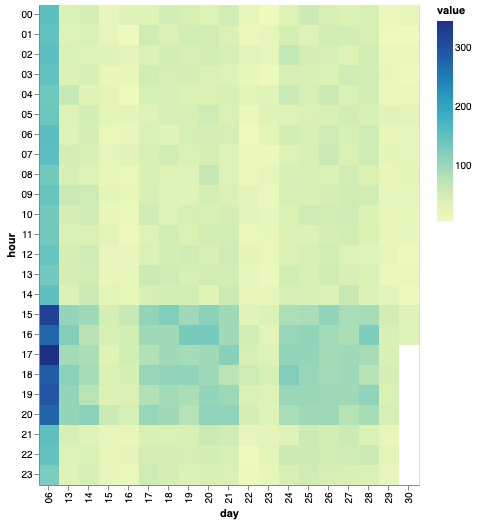

In [29]:
df26 = load_input_table("026.json")
#https://sites.google.com/site/e90e50/user/grafici-dispersione-excel-intersezioni-udf
display(df26)
split_col = df26["data_ora"].str.split("_", expand=True)
df26["day"] =  [str(x) for x in split_col[0]]
df26["hour"] =  [str(x) for x in split_col[1]]
df26 = df26.groupby(["day", "hour"])["value"].sum().reset_index()

display(df26)
#print(json.dumps(df26.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "rect",
    "encoding": {
        "x": { "field": "day", "type": "ordinal"},
        "color": { "field": "value", "type": "quantitative"},
        "y": { "field": "hour", "type": "ordinal"},
    }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df26)

Period variable  value
0         Actual       00  120.0
1   Interval = 2       00    0.0
2   Interval = 4       00    0.0
3   Interval = 6       00    0.0
4         Actual       01  150.0
..           ...      ...    ...
43  Interval = 6       10  536.0
44        Actual       11  950.0
45  Interval = 2       11  725.0
46  Interval = 4       11  700.0
47  Interval = 6       11  631.0

[48 rows x 3 columns]

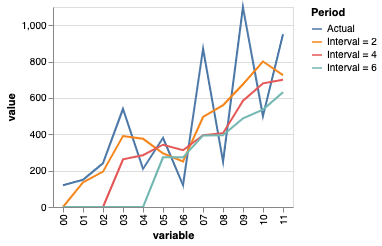

In [30]:
df27 = load_input_table("027.json")

df27 = pd.melt(df27, id_vars=['Period'], value_vars=["00", "01", "02", "03", "04", '05', '06', "07", "08", "09", "10", "11"])

display(df27)
#print(json.dumps(df27.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "line",
    "encoding": {
        "x": { "field": "variable", "type": "nominal"},
        "y": { "field": "value", "type": "quantitative"},
        "color": { "field": "Period", "type": "nominal"},
    }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df27)

cuts  Number of students
0  (19,26]                   9
1  (26,32]                   3
2  (32,39]                   2
3  (39,45]                   2
4  (45,52]                   2

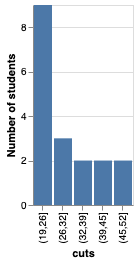

In [31]:
df28 = load_input_table("028.json")

df28["cuts"] = pd.cut(df28['Number of students'], 5, precision=0)
df28 = df28.groupby(['cuts']).count().reset_index()
df28["cuts"] = [str("({},{}]".format(int(x.left), int(x.right))) for x in df28["cuts"]]

display(df28)
#print(json.dumps(df28.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "x": { "field": "cuts", "type": "nominal"},
        "y": { "field": "Number of students", "type": "quantitative"},
    }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df28)

Sport  Rank             variable  value  Archery
0              Archery    55            Endurance   2.88     True
1          Auto Racing    32            Endurance   5.88    False
2            Badminton    30            Endurance   5.25    False
3    Baseball/Softball     9            Endurance   4.63    False
4           Basketball     4            Endurance   7.38    False
..                 ...   ...                  ...    ...      ...
595         Volleyball    20  Analytical-Aptitude   5.88    False
596         Water Polo    11  Analytical-Aptitude   5.63    False
597       Water Skiing    46  Analytical-Aptitude   3.25    False
598     Weight-Lifting    44  Analytical-Aptitude   2.38    False
599          Wrestling     5  Analytical-Aptitude   6.38    False

[600 rows x 5 columns]

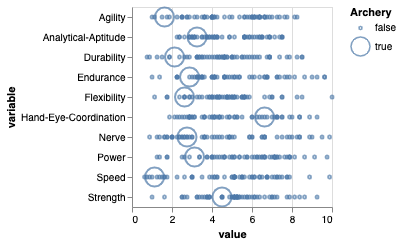

In [32]:
df29 = load_input_table("029.json")

df29 = pd.melt(df29, id_vars=['Sport', "Rank"], value_vars=["Endurance", "Strength", "Power", "Speed", "Agility", "Flexibility", "Nerve", "Durability", "Hand-Eye-Coordination", "Analytical-Aptitude"])

df29["Archery"] = df29["Sport"] == "Archery"

display(df29)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "point",
    "encoding": {
        "x": { "field": "value", "type": "quantitative"},
        "y": { "field": "variable", "type": "nominal"},
        "size": {"field": "Archery", 'type': "nominal"}
    }
   
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df29)

Sport  Rank             variable  value  Archery
0              Archery    55            Endurance   2.88     True
1          Auto Racing    32            Endurance   5.88    False
2            Badminton    30            Endurance   5.25    False
3    Baseball/Softball     9            Endurance   4.63    False
4           Basketball     4            Endurance   7.38    False
..                 ...   ...                  ...    ...      ...
595         Volleyball    20  Analytical-Aptitude   5.88    False
596         Water Polo    11  Analytical-Aptitude   5.63    False
597       Water Skiing    46  Analytical-Aptitude   3.25    False
598     Weight-Lifting    44  Analytical-Aptitude   2.38    False
599          Wrestling     5  Analytical-Aptitude   6.38    False

[600 rows x 5 columns]

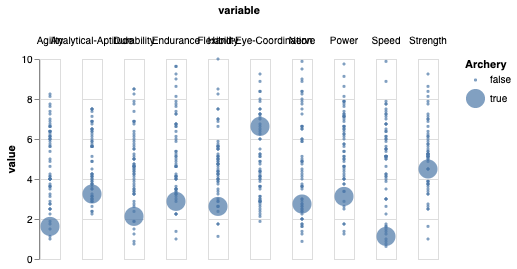

In [33]:
df30 = load_input_table("030.json")

df30 = pd.melt(df30, id_vars=['Sport', "Rank"], 
                     value_vars=["Endurance", "Strength", "Power", "Speed", "Agility", "Flexibility", "Nerve", "Durability", "Hand-Eye-Coordination", "Analytical-Aptitude"])
df30["Archery"] = df30["Sport"] == "Archery"

display(df30)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "circle",
    "encoding": {
        "y": { "field": "value", "type": "quantitative"},
        "column": {"field": "variable", 'type': "nominal"},
        "size": {"field": "Archery", 'type': "nominal"}
    }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df30)

Emp Num       Performance Rating   Group Name  Salary Increase $  \
0       11505   Successful Performance  Development                0.0   
1       11529   Successful Performance  Development             1644.0   
2       11537  Outstanding Performance  Development                0.0   
3       11538              Not Meeting  Development                0.0   
4       11539            Achieved Most  Development                0.0   
...       ...                      ...          ...                ...   
3681    53633   Successful Performance      Support             1256.0   
3682    53644   Successful Performance  Development              527.0   
3683    53657   Successful Performance      Support             1621.0   
3684    53659            Achieved Most      Support                0.0   
3685    53669   Successful Performance      Support                0.0   

      Rating 17 (number)  Business Group  Noise  Ratings X Total Increase  
0                      3               4 -0.152     46.098           #N/A  
1                      3               4  0.079     46.329           1644  
2                      4               4  0.639     49.389           #N/A  
3                      1               4 -0.406     40.844           #N/A  
4                      2               4 -0.222     43.528           #N/A  
...                  ...             ...    ...        ...            ...  
3681                   3               6 -0.489     65.761           1256  
3682                   3               4 -0.281     45.969            527  
3683                   3               6 -0.507     65.743           1621  
3684                   2               6  0.031     63.781           #N/A  
3685                   3               6  0.650     66.900           #N/A  

[3686 rows x 9 columns]

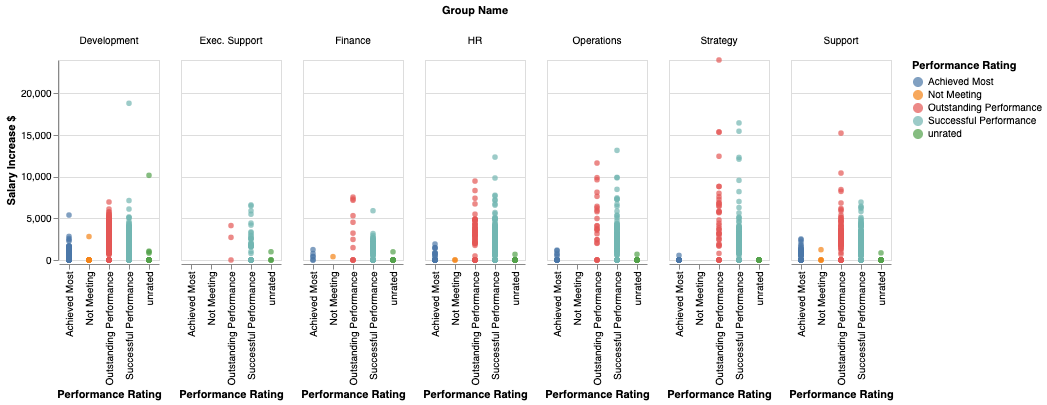

In [34]:
df31 = load_input_table("031.json")

display(df31)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "circle",
    "encoding": {
        "x": { "field": "Performance Rating", "type": "nominal"},
        "color": { "field": "Performance Rating", "type": "nominal"},
        "column": {"field": "Group Name", 'type': "nominal"},
        "y": {"field": "Salary Increase $", 'type': "quantitative"}
    }
   
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df31)

id  variable  value
0    0  Serie1_y     63
1    1  Serie1_y    123
2    2  Serie1_y    213
3    3  Serie1_y    234
4    4  Serie1_y    322
..  ..       ...    ...
33  14  Serie2_y    772
34  15  Serie2_y    799
35  16  Serie2_y    882
36  17  Serie2_y    976
37  18  Serie2_y    990

[38 rows x 3 columns]

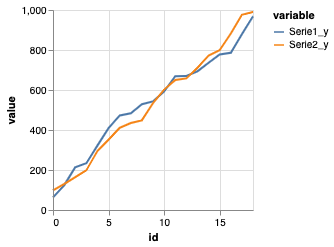

In [35]:
df32 = load_input_table("032.json")

df32 = pd.melt(df32, id_vars="id", value_vars=["Serie1_y", "Serie2_y"])

display(df32)
#print(df32.to_json(orient="records"))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "line",
    "encoding": {
        "x": { "field": "id", "type": "quantitative"},
        "color": { "field": "variable", "type": "nominal"},
        "y": {"field": "value", 'type': "quantitative"}
    }
   
}

#print(json.dumps(spec, indent=4))
VegaLite(spec, df32)

activity variable      value
0                  Playing billiards        0   3172.450
1                            Dancing        0  16784.600
2                           Softball        0      0.000
3                            Bowling        0   1154.160
4                 Playing volleyball        0      0.000
...                              ...      ...        ...
8059                  Doing aerobics     1435      0.000
8060                         Walking     1435   4370.690
8061                         Running     1435   1386.220
8062        Working out, unspecified     1435   3485.720
8063  Using cardiovascular equipment     1435    894.043

[8064 rows x 3 columns]

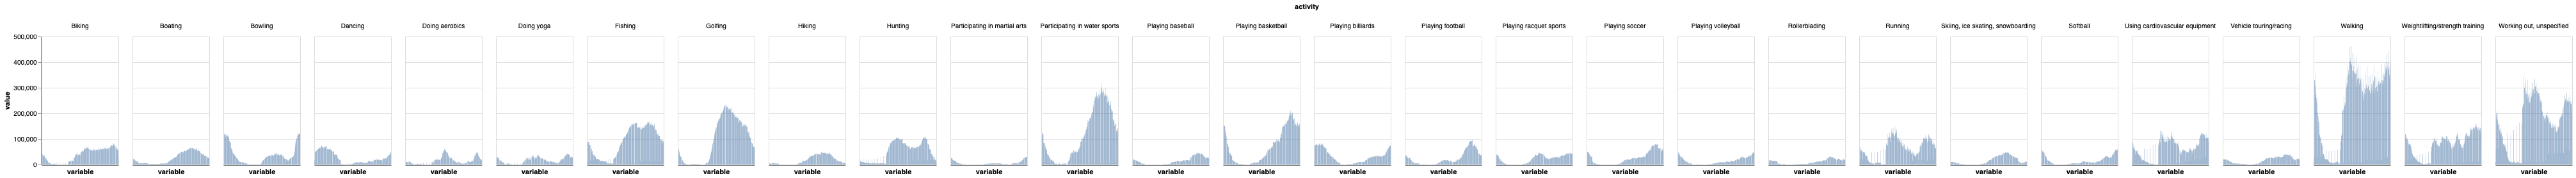

In [36]:
df33 = load_input_table("033.json")

df33 = pd.melt(df33, id_vars="activity", value_vars=["0", "5", "10", "15", "20", "25", "30", "35", "40", "45", "50", "55", "60", "65", "70", "75", "80", "85", "90", "95", "100", "105", "110", "115", "120", "125", "130", "135", "140", "145", "150", "155", "160", "165", "170", "175", "180", "185", "190", "195", "200", "205", "210", "215", "220", "225", "230", "235", "240", "245", "250", "255", "260", "265", "270", "275", "280", "285", "290", "295", "300", "305", "310", "315", "320", "325", "330", "335", "340", "345", "350", "355", "360", "365", "370", "375", "380", "385", "390", "395", "400", "405", "410", "415", "420", "425", "430", "435", "440", "445", "450", "455", "460", "465", "470", "475", "480", "485", "490", "495", "500", "505", "510", "515", "520", "525", "530", "535", "540", "545", "550", "555", "560", "565", "570", "575", "580", "585", "590", "595", "600", "605", "610", "615", "620", "625", "630", "635", "640", "645", "650", "655", "660", "665", "670", "675", "680", "685", "690", "695", "700", "705", "710", "715", "720", "725", "730", "735", "740", "745", "750", "755", "760", "765", "770", "775", "780", "785", "790", "795", "800", "805", "810", "815", "820", "825", "830", "835", "840", "845", "850", "855", "860", "865", "870", "875", "880", "885", "890", "895", "900", "905", "910", "915", "920", "925", "930", "935", "940", "945", "950", "955", "960", "965", "970", "975", "980", "985", "990", "995", "1000", "1005", "1010", "1015", "1020", "1025", "1030", "1035", "1040", "1045", "1050", "1055", "1060", "1065", "1070", "1075", "1080", "1085", "1090", "1095", "1100", "1105", "1110", "1115", "1120", "1125", "1130", "1135", "1140", "1145", "1150", "1155", "1160", "1165", "1170", "1175", "1180", "1185", "1190", "1195", "1200", "1205", "1210", "1215", "1220", "1225", "1230", "1235", "1240", "1245", "1250", "1255", "1260", "1265", "1270", "1275", "1280", "1285", "1290", "1295", "1300", "1305", "1310", "1315", "1320", "1325", "1330", "1335", "1340", "1345", "1350", "1355", "1360", "1365", "1370", "1375", "1380", "1385", "1390", "1395", "1400", "1405", "1410", "1415", "1420", "1425", "1430", "1435"])
display(df33)

#print(json.dumps(df33.to_dict(orient="records")))


spec = {
    "width": 120,
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "x": { "field": "variable", "type": "nominal"},
        "column": {"field": "activity", 'type': "nominal"},
        "y": {"field": "value", 'type': "quantitative"}
    },
    "config": {"axisX": {"labels": False, "ticks": False}}
}

#print(json.dumps(spec, indent=4))
VegaLite(spec, df33)

Timeline                variable    value
11   Jun-16                Forecast     1097
12   Jul-16                Forecast  939.925
13   Aug-16                Forecast  924.496
14   Sep-16                Forecast  909.067
26   Jun-16  Lower Confidence Bound     1097
..      ...                     ...      ...
52   Feb-16                  Values      742
53   Mar-16                  Values     1955
54   Apr-16                  Values     1466
55   May-16                  Values      584
56   Jun-16                  Values     1097

[24 rows x 3 columns]

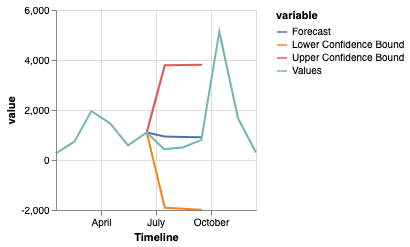

In [37]:
df34 = load_input_table("034.json")

df34 = pd.melt(df34, id_vars="Timeline", value_vars=["Forecast", "Lower Confidence Bound", "Upper Confidence Bound", "Values"])
df34 = df34[df34["value"] != ""]

display(df34)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "line",
    "encoding": {
        "x": { "field": "Timeline", "type": "temporal"},
        "color": {"field": "variable", 'type': "nominal"},
        "y": {"field": "value", 'type': "quantitative"}
    }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df34)

DATA variable  value
0     A    Lower     80
1     B    Lower    103
2     C    Lower    106
3     D    Lower     75
4     E    Lower     85
..  ...      ...    ...
10    A    Value    100
11    B    Value    120
12    C    Value    140
13    D    Value     80
14    E    Value     90

[15 rows x 3 columns]

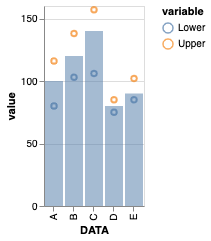

In [38]:
df35 = load_input_table("035.json")
df35 = pd.melt(df35, id_vars=["DATA"], value_vars=["Lower", "Upper", "Value"])

display(df35)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
          "mark": {"type": "bar", "opacity": 0.5},
          "transform": [{"filter": "datum.variable == \"Value\""}],
          "encoding": { "x": {"field": "DATA", "type": "nominal"},
                        "y": { "field": "value", "type": "quantitative" }}
        },
        {
          "mark": {"type": "point"},
          "transform": [{"filter": "datum.variable != \"Value\""}],
          "encoding": {
            "x": {"field": "DATA", "type": "nominal"},
            "y": {"field": "value", "type": "quantitative"},
            "color": {"field": "variable", "type": "nominal"}
          }
        }
    ]
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df35)

Close       Date    variable    value  color
0      7210.770020   1-Jul-05  VolumeDiff      NaN  False
1      7212.080078   4-Jul-05  VolumeDiff    800.0   True
2      7271.540039  11-Jul-05  VolumeDiff    200.0  False
3      7423.250000  18-Jul-05  VolumeDiff    600.0  False
4      7635.419922  25-Jul-05  VolumeDiff   5500.0   True
...            ...        ...         ...      ...    ...
1049  28092.789060  29-Jun-15      Volume  10300.0   True
1050  27661.400390   6-Jul-15      Volume   9800.0   True
1051  28463.310550  13-Jul-15      Volume   7300.0   True
1052  28112.310550  20-Jul-15      Volume   9200.0   True
1053  27459.230470  27-Jul-15      Volume  10600.0   True

[1054 rows x 5 columns]

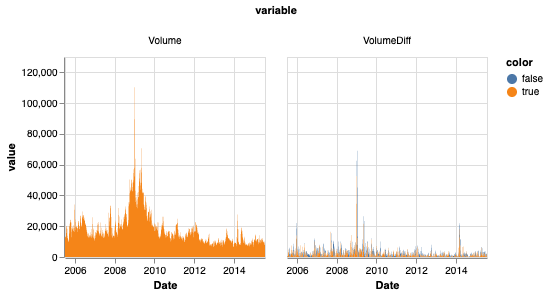

In [39]:
df36 = load_input_table("036.json")

df36["VolumeDiff"] = df36["Volume"].diff()
df36 = pd.melt(df36, id_vars=["Close", "Date"], value_vars=["VolumeDiff", "Volume"])
df36["color"] = df36['value'] > 0
df36["value"] = df36["value"].abs()

display(df36)
#print(df36.to_json(orient="records"))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
      "mark": "area",
      "encoding": {
        "x": {"field": "Date", "type": "temporal"},
        "y": {"field": "value", "type": "quantitative"},
        "color": {"field": "color", "type": "nominal"},
        "column": {"field": "variable", "type": "nominal" }
      }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df36)

TOTAL                     Category variable  value
0     645              HOME APPLIANCES    <-10%    451
1     568                    COMPUTERS    <-10%    394
2     355         CAMERAS & CAMCORDERS    <-10%    245
3     265                  CELL PHONES    <-10%    185
4     205                   TV & VIDEO    <-10%    143
..    ...                          ...      ...    ...
27    265                  CELL PHONES     >=0%    212
28    205                   TV & VIDEO     >=0%    163
29    166                 GAMES & TOYS     >=0%    141
30    100                        AUDIO     >=0%     87
31     90  MUSIC, MOVIES & AUDIO BOOKS     >=0%     70

[32 rows x 4 columns]

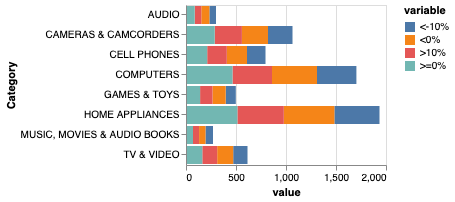

In [40]:
df37 = load_input_table("037.json")

df37 = pd.melt(df37, id_vars=["TOTAL", "Category"], value_vars=["<-10%", "<0%", ">10%", ">=0%"])
df37["value"] = df37["TOTAL"] - df37["value"]

display(df37)
#print(df37.to_json(orient="records"))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"type": "bar"},
    "encoding": {
        "color": {"field": "variable", "type": "nominal"},
        "y": {"field": "Category", "type": "nominal"},
        "x": { "field": "value", "type": "quantitative"}    
    }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df37)

Salary in USD  Job Type
0            58000   Analyst
1            54000  Engineer
2            49000   Analyst
3            85000  Engineer
4            75000  Engineer
..             ...       ...
612          46000   Analyst
613         115000   Analyst
614          40000   Analyst
615          46359   Analyst
616          70000   Analyst

[617 rows x 2 columns]

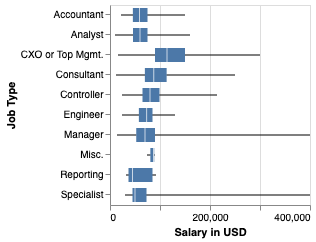

In [41]:
df38_discard = load_input_table("038_discard.json")

display(df38_discard)

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": {
    "type": "boxplot",
    "extent": "min-max"
  },
  "encoding": {
    "x": {"field": "Salary in USD","type": "quantitative"},
    "y": {
      "field": "Job Type",
      "type": "nominal",
    }
  }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df38_discard)

x variable  value
0   1   group1     56
1   2   group1     23
2   3   group1     96
3   4   group1     24
4   5   group1     75
.. ..      ...    ...
27  4   group4     95
28  5   group4     46
29  6   group4     78
30  7   group4     55
31  8   group4     41

[32 rows x 3 columns]

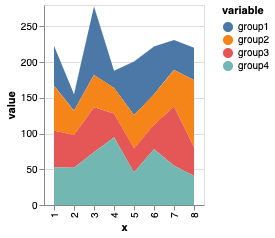

In [42]:
df38 = load_input_table("038.json")
#https://sites.google.com/site/e90e50fx/home/stacked-and-separated-dynamic-excel-charts

df38 = pd.melt(df38, id_vars=["x"], value_vars=["group1", "group2", "group3", "group4"])

display(df38)
#print(df38.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": {
    "type": "area"
  },
  "encoding": {
    "x": {"field": "x","type": "ordinal"},
    "y": { "field": "value", "type": "quantitative" },
    "color": { "field": "variable", "type": "nominal" }
  }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df38)

Year    loc  Bisc  Choc
0   2007  NORTH   6.0  14.0
1   2007  SOUTH   4.0  10.0
2   2007   WEST   4.0   6.0
3   2008  NORTH   6.7  18.0
4   2008  SOUTH   5.0  11.0
..   ...    ...   ...   ...
7   2009  SOUTH   5.7  14.0
8   2009   WEST   5.7  12.0
9   2010  NORTH   8.0  21.0
10  2010  SOUTH   6.0  16.0
11  2010   WEST   6.0  15.0

[12 rows x 4 columns]

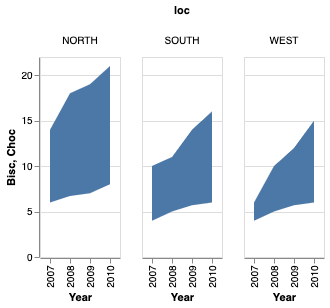

In [43]:
df39 = load_input_table("039.json")

df39 = pd.melt(df39, id_vars=["Year"], 
               value_vars=["NORTH-Bisc", "NORTH-Choc", "SOUTH-Bisc", "SOUTH-Choc", "WEST-Bisc", "WEST-Choc"])
split_col = df39["variable"].str.split("-", expand=True)
df39["loc"] = split_col[0]
df39["type"] = split_col[1]
df39 = df39.pivot_table(index=["Year", "loc"], columns='type', values=['value']).reset_index()
df39.columns = ["Year", "loc", "Bisc", "Choc"]

display(df39)

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": {
    "type": "area"
  },
  "encoding": {
    "x": {"field": "Year","type": "ordinal"},
    "y": { "field": "Bisc", "type": "quantitative" },
    "y2": { "field": "Choc", "type": "quantitative" },
    "column": { "field": "loc", "type": "nominal" }
  }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df39)

id  Value Win / Loss  end  start
0    0     10        Win   10      0
1    1      2       Loss   12     10
2    2     12        Win   24     12
3    3      4       Loss   28     24
4    4      5        Win   33     28
..  ..    ...        ...  ...    ...
8    8     12        Win   88     76
9    9      3       Loss   91     88
10  10      4        Win   95     91
11  11      4       Loss   99     95
12  12      1        Win  100     99

[13 rows x 5 columns]

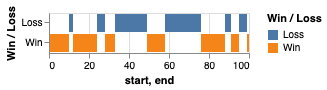

In [44]:
df40 = load_input_table("040.json")

df40["end"] = df40["Value"].cumsum()
df40["start"] = df40["end"] - df40["Value"]

display(df40)

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": {
    "type": "bar"
  },
  "encoding": {
    "x": {"field": "start","type": "quantitative"},
    "x2": {"field": "end","type": "quantitative"},
    "color": { "field": "Win / Loss", "type": "nominal" },
    "y": { "field": "Win / Loss", "type": "nominal" }
  }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df40)

Year variable     value
0   1950      Cod   2716706
1   1951      Cod   3861166
2   1952      Cod   4396174
3   1953      Cod   3901176
4   1954      Cod   4412721
..   ...      ...       ...
25  1951     Tuna  34829755
26  1952     Tuna  31061481
27  1953     Tuna  23225423
28  1954     Tuna  20798126
29  1955     Tuna  13992697

[30 rows x 3 columns]

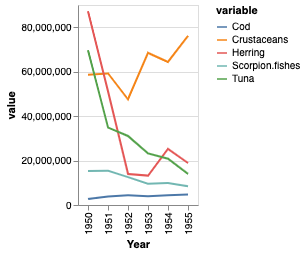

In [45]:
df41 = load_input_table("041.json")

df41 = pd.melt(df41, id_vars='Year', value_vars=["Cod", "Crustaceans", "Herring", "Scorpion.fishes", "Tuna"])

display(df41)
# print(df41.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": {
    "type": "line"
  },
  "encoding": {
    "x": {"field": "Year", "type": "ordinal"},
    "color": { "field": "variable", "type": "nominal" },
    "y": { "field": "value", "type": "quantitative" }
  }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df41)

date variable     value
0    2002-01-01     var0  100.0000
1    2002-02-01     var0   87.6560
2    2002-03-01     var0   78.7880
3    2002-04-01     var0   64.8441
4    2002-05-01     var0   83.3027
..          ...      ...       ...
195  2009-12-01     var1  167.6651
196  2010-01-01     var1  157.8813
197  2010-02-01     var1  162.9670
198  2010-03-01     var1  159.8805
199  2010-04-01     var1  159.3445

[200 rows x 3 columns]

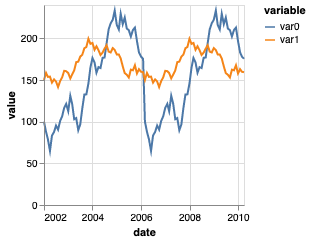

In [46]:
df42 = load_input_table("042.json")

df42 = pd.melt(df42, id_vars='date', value_vars=["var0", "var1"])

display(df42)

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": {
    "type": "line"
  },
  "encoding": {
    "x": {"field": "date", "type": "temporal"},
    "color": { "field": "variable", "type": "nominal" },
    "y": { "field": "value", "type": "quantitative" }
  }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df42)

variable      value  depth  price  table   x   y   z  carat
0   clarity         I1      3      3      3   3   3   3      3
1   clarity         IF      1      1      1   1   1   1      1
2   clarity        SI1     19     19     19  19  19  19     19
3   clarity        SI2     25     25     25  25  25  25     25
4   clarity        VS1     10     10     10  10  10  10     10
..      ...        ...    ...    ...    ...  ..  ..  ..    ...
15      cut       Fair      3      3      3   3   3   3      3
16      cut       Good      9      9      9   9   9   9      9
17      cut      Ideal     45     45     45  45  45  45     45
18      cut    Premium     18     18     18  18  18  18     18
19      cut  Very Good     25     25     25  25  25  25     25

[20 rows x 9 columns]

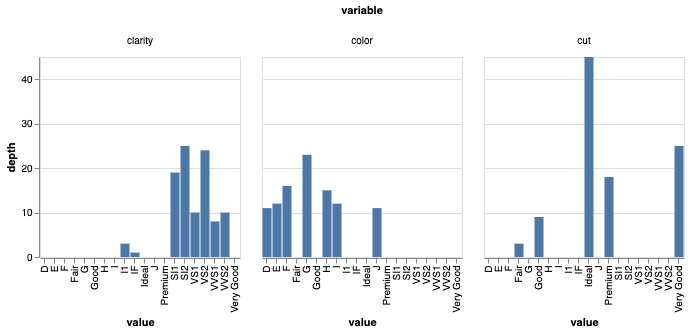

In [47]:
df43 = load_input_table("043.json")

df43 = pd.melt(df43, id_vars=["depth", "price", "table", "x", "y", "z", "carat"], value_vars=["clarity", "color", "cut"])
df43 = df43.groupby(['variable', "value"]).count().reset_index()

display(df43)

#print(df43.to_json(orient="records"))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {
        "type": "bar"
    },
    "width": 200,
    "encoding": {
        "x": {"field": "value", "type": "nominal"},
        "column": { "field": "variable", "type": "nominal" },
        "y": { "field": "depth", "type": "quantitative" }
    }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df43)

Species      variable  value
0       setosa  Petal.Length    722
1       setosa   Petal.Width    123
2       setosa  Sepal.Length   2143
3       setosa   Sepal.Width   1516
4   versicolor  Petal.Length   1878
..         ...           ...    ...
7   versicolor   Sepal.Width   1151
8    virginica  Petal.Length   2533
9    virginica   Petal.Width    905
10   virginica  Sepal.Length   3186
11   virginica   Sepal.Width   1163

[12 rows x 3 columns]

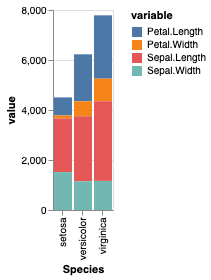

In [48]:
df44 = load_input_table("044.json")

df44 = pd.melt(df44, id_vars=["Species"], value_vars=["Petal.Length","Petal.Width","Sepal.Length","Sepal.Width"])
df44 = df44.groupby(['Species', "variable"]).sum().reset_index()

display(df44)
#print(df44.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": {
    "type": "bar"
  },
  "encoding": {
    "x": {"field": "Species", "type": "nominal"},
    "color": { "field": "variable", "type": "nominal" },
    "y": { "field": "value", "type": "quantitative" }
  }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df44)

X1 variable  value
0       Diversity       B1    5.1
1    Endangerment       B1    4.9
2   Marketability       B1    4.7
3           Total       B1    4.6
4       Diversity       B2    3.5
..            ...      ...    ...
11          Total       B3    1.5
12      Diversity       B4    7.1
13   Endangerment       B4    4.7
14  Marketability       B4    3.2
15          Total       B4    5.1

[16 rows x 3 columns]

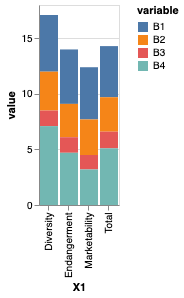

In [49]:
df45 = load_input_table("045.json")

df45 = pd.melt(df45, id_vars=["X1"], value_vars=["B1", "B2", "B3", "B4"])

display(df45)
#print(df45.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": {
    "type": "bar"
  },
  "encoding": {
    "x": {"field": "X1", "type": "nominal"},
    "color": { "field": "variable", "type": "nominal" },
    "y": { "field": "value", "type": "quantitative" }
  }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df45)

date    Y2K variable  value
0   2012-07-01  False  psavert    6.6
1   2001-09-01  False  psavert    6.3
2   2011-08-01  False  psavert    6.2
3   2005-07-01  False  psavert    1.9
4   1989-05-01   True  psavert    7.6
..         ...    ...      ...    ...
95  2001-06-01  False  uempmed    6.0
96  2007-10-01  False  uempmed    8.4
97  1981-04-01   True  uempmed    7.4
98  1984-08-01   True  uempmed    7.3
99  1974-10-01   True  uempmed    5.5

[100 rows x 4 columns]

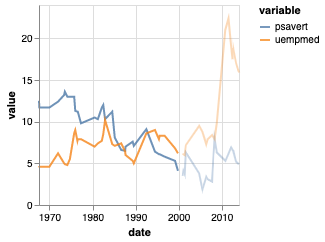

In [50]:
df46 = load_input_table("046.json")

df46["Y2K"] = pd.to_datetime(df46['date']).dt.year < 2000
df46 = pd.melt(df46, id_vars=["date", "Y2K"], value_vars=["psavert", "uempmed"])

display(df46)
#print(df46.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "line" },
  "encoding": {
    "x": {"field": "date", "type": "temporal"},
    "color": { "field": "variable", "type": "nominal" },
    "strokeOpacity": { "field": "Y2K", "type": "nominal" },
    "y": { "field": "value", "type": "quantitative" }
  }
}

#display(spec)
#print(json.dumps(spec, indent=4))

VegaLite(spec, df46)

label  variable  value
0   Label1        ok    0.0
1   Label2        ok    0.5
2   Label3        ok    0.4
3   Label4        ok    0.9
4   Label5        ok    0.4
..     ...       ...    ...
11  Label4  mutate_a    0.1
12  Label5  mutate_a    0.6
13  Label6  mutate_a    0.1
14  Label7  mutate_a    0.2
15  Label8  mutate_a    0.2

[16 rows x 3 columns]

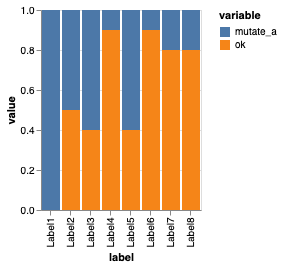

In [51]:
df47 = load_input_table("047.json")

df47["mutate_a"] = df47['total'] - df47['ok']
df47 = pd.melt(df47, id_vars=["label"], value_vars=["ok", "mutate_a"])

display(df47)
#print(df47.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "bar" },
  "encoding": {
    "x": {"field": "label", "type": "nominal"},
    "color": { "field": "variable", "type": "nominal" },
    "y": { "field": "value", "type": "quantitative" }
  }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df47)

category  totalABC variable  value
0   group1        17        A     15
1   group2       163        A    125
2   group1        17        B      3
3   group2       163        B     48
4   group1        17        C     16
5   group2       163        C    153

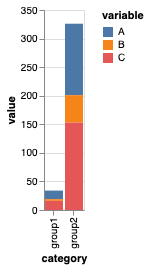

In [52]:
df48 = load_input_table("048.json")
df48 = df48.groupby("category").sum().reset_index()
df48 = pd.melt(df48, id_vars=["category", "totalABC"], value_vars=["A", "B", "C"])
df48["value"] = df48["totalABC"] - df48["value"]

display(df48)

#print(df48.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "bar" },
  "encoding": {
    "x": {"field": "category", "type": "nominal"},
    "color": { "field": "variable", "type": "nominal" },
    "y": { "field": "value", "type": "quantitative" }
  }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df48)

scenario1    row    drain  measured  simulated
0            0.5    drain      40.0       39.9
1            0.5  nodrain      40.0       41.0
2            0.8    drain      55.0       55.3
3            0.8  nodrain      55.0       56.0
4          adj21    drain      23.0       23.4
..           ...      ...       ...        ...
7          adj22  nodrain      27.0       27.5
8          raw21    drain      55.0       54.5
9          raw21  nodrain      55.0       54.0
10         raw22    drain      60.0       60.2
11         raw22  nodrain      60.0       59.0

[12 rows x 4 columns]

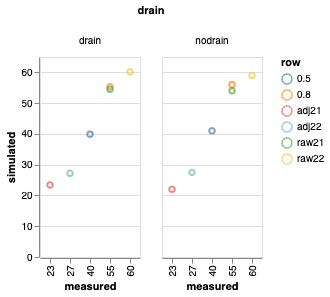

In [53]:
import numpy as np

df49 = load_input_table("049.json")

splits = pd.DataFrame(df49["scenario"].str.split('_', 2).tolist(), columns = ['scenario1','row', "drain"])
df49 = pd.concat([df49, splits], axis=1).reset_index()
df49 = df49.pivot_table(index=["row", "drain"], columns='scenario1', values='value').reset_index()

display(df49)
#print(df49.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "point" },
  "encoding": {
    "x": {"field": "measured", "type": "nominal"},
    "color": { "field": "row", "type": "nominal" },
    "y": { "field": "simulated", "type": "quantitative" },
    "column": { "field": "drain", "type": "nominal" }
  }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df49)

prod      ing      mg  id
0   product a  protein  2.4235   1
1   product a      fat  6.4549   1
2   product a   starch  3.3342   1
3   product a  protein  3.5926   2
4   product a      fat  5.2545   2
..        ...      ...     ...  ..
85  product c      fat  3.5826   9
86  product c   starch  6.1353   9
87  product c  protein  5.5974  10
88  product c      fat  5.0795  10
89  product c   starch  7.6485  10

[90 rows x 4 columns]

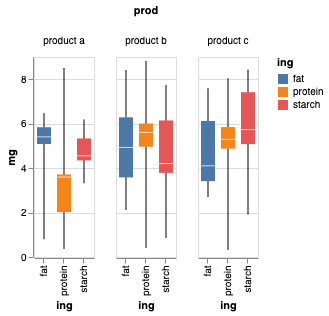

In [54]:
df50_discard = load_input_table("050_discard.json")

display(df50_discard)
#print(df50_discard.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "boxplot", "extent": "min-max"},
  "encoding": {
    "x": {"field": "ing", "type": "nominal"},
    "color": { "field": "ing", "type": "nominal" },
    "y": { "field": "mg", "type": "quantitative" },
    "column": { "field": "prod", "type": "nominal" }
  }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df50_discard)

id         variable     value
0    0  Consuntivo 2010   42560.0
1    1  Consuntivo 2010   46368.0
2    2  Consuntivo 2010   46826.0
3    3  Consuntivo 2010   53090.0
4    4  Consuntivo 2010   60331.0
..  ..              ...       ...
31   7   Obiettivo 2011  102342.8
32   8   Obiettivo 2011  112000.0
33   9   Obiettivo 2011  117490.8
34  10   Obiettivo 2011  121420.6
35  11   Obiettivo 2011  124444.6

[36 rows x 3 columns]

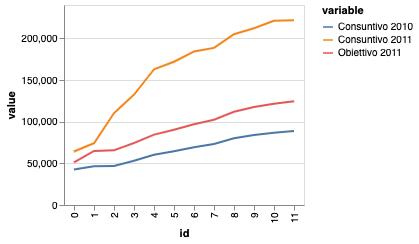

In [55]:
df50 = load_input_table("050.json")

df50 = pd.melt(df50, id_vars='id', value_vars=["Consuntivo 2010", "Consuntivo 2011", "Obiettivo 2011"])

display(df50)
#print(df50.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "line" },
  "encoding": {
    "x": {"field": "id", "type": "ordinal"},
    "color": { "field": "variable", "type": "nominal" },
    "y": { "field": "value", "type": "quantitative" },
  }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df50)

Feature  Condition Sex   A  Aneg   p
0                1   F   2     5   7
1                1   M   6     1   7
2                2   F   3     6   9
3                2   M   4     2   6
4                3   F   4     9  13
5                3   M  10     6  16

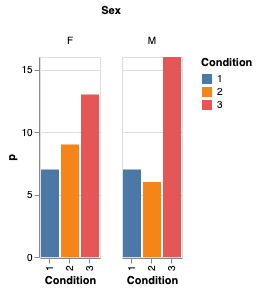

In [56]:
df51 = load_input_table("051.json")

df51 = df51.pivot_table(index=["Condition", "Sex"], columns='Feature', values='value').reset_index()
df51["p"] =  (df51["A"] + df51["Aneg"])

display(df51)
#print(df51.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "bar"},
  "encoding": {
    "x": {"field": "Condition", "type": "nominal"},
    "color": { "field": "Condition", "type": "nominal" },
    "y": { "field": "p", "type": "quantitative" },
    "column": { "field": "Sex", "type": "nominal" }
  }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df51)

Car Country  Value
0  Audi A6      US     23
1  Audi A6      UK     12
2  Audi A6      DE     19
3   BMW X5      UK      8
4   BMW X5      DE      5

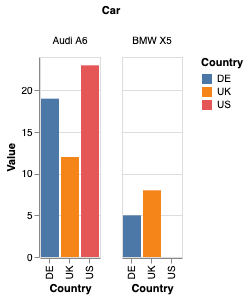

In [57]:
df52_discard = load_input_table("052_discard.json")
#no transformation

display(df52_discard)

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "bar"},
  "encoding": {
    "x": {"field": "Country", "type": "nominal"},
    "color": { "field": "Country", "type": "nominal" },
    "y": { "field": "Value", "type": "quantitative" },
    "column": { "field": "Car", "type": "nominal" }
  }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df52_discard)

Label variable  value
0    Label_1    bar 0    100
1    Label_2    bar 0    114
2    Label_3    bar 0    151
3    Label_4    bar 0    175
4    Label_5    bar 0    178
..       ...      ...    ...
43   Label_8    bar 3     26
44   Label_9    bar 3     25
45  Label_10    bar 3     21
46  Label_11    bar 3     23
47  Label_12    bar 3     28

[48 rows x 3 columns]

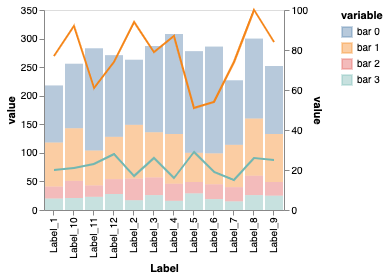

In [58]:
df52 = load_input_table("052.json")
#https://sites.google.com/site/e90e50fx/home/stacked-column-chart-with-more-trendlines

df52 = pd.melt(df52, id_vars=["Label"], value_vars=["bar 0", "bar 1", "bar 2", "bar 3"])

display(df52)
#print(df52.to_json(orient="records"))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": {"opacity": 0.4, "type": "bar"},
            "encoding": {
                "y": {"field": "value", "type": "quantitative"},
                "x": { "field": "Label", "type": "nominal" },
                "color": { "field": "variable", "type": "nominal" }
            }
        }, 
        {
            "mark": {"type": "line"},
            "transform": [{"filter": "datum.variable == \"bar 1\" || datum.variable == \"bar 3\""}],
            "encoding": {
                "y": {"field": "value", "type": "quantitative"},
                "x": { "field": "Label", "type": "nominal" },
                "color": { "field": "variable", "type": "nominal" }
            }
        }
  ],
  "resolve": {"scale": {"y": "independent"}}
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df52)

classes    date  score
0  english  9/1/11      1
1  english  9/2/11      1
2  english  9/5/11      2
3   french  9/1/11      2
4   french  9/2/11      1
5   french  9/5/11      1
6  spanish  9/1/11      1
7  spanish  9/3/11      2
8  spanish  9/5/11      1

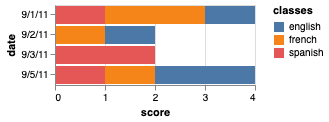

In [59]:
df53 = load_input_table("053.json")

df53 = df53.groupby(['classes', 'date']).count().reset_index()

display(df53)
#print(df53.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "bar"},
  "encoding": {
    "y": {"field": "date", "type": "nominal"},
    "color": { "field": "classes", "type": "nominal" },
    "x": { "field": "score", "type": "quantitative" },
  }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df53)

NAME    ACH_DATE               MEASURE  VALUE
0    WEST YORKSHIRE  2017-09-01     DIAG_RATE_65_PLUS   73.6
1    WEST YORKSHIRE  2017-09-01  DIAG_RATE_65_PLUS_LL   66.2
2    WEST YORKSHIRE  2017-09-01  DIAG_RATE_65_PLUS_UL   79.8
3    WEST YORKSHIRE  2017-10-01     DIAG_RATE_65_PLUS   73.7
4    WEST YORKSHIRE  2017-10-01  DIAG_RATE_65_PLUS_LL   66.3
..              ...         ...                   ...    ...
7   NOTTINGHAMSHIRE  2017-09-01  DIAG_RATE_65_PLUS_LL   69.1
8   NOTTINGHAMSHIRE  2017-09-01  DIAG_RATE_65_PLUS_UL   83.6
9   NOTTINGHAMSHIRE  2017-10-01     DIAG_RATE_65_PLUS   77.5
10  NOTTINGHAMSHIRE  2017-10-01  DIAG_RATE_65_PLUS_LL   69.6
11  NOTTINGHAMSHIRE  2017-10-01  DIAG_RATE_65_PLUS_UL   84.2

[12 rows x 4 columns]

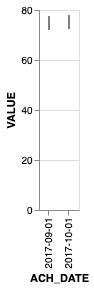

In [60]:
df54_discard = load_input_table("054_discard.json")
#no transformation

display(df54_discard)
#print(df54_discard.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "errorbar"},
  "encoding": {
    "y": {"field": "VALUE", "type": "quantitative"},
    "x": { "field": "ACH_DATE", "type": "nominal" },
    #"color": { "field": "MEASURE", "type": "nominal" },
  }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df54_discard)

x    h  h_bar   y2
0    Label_1  102     76  178
1    Label_2  124     90  214
2    Label_3  126     76  202
3    Label_4  139     65  204
4    Label_5  177     65  242
..       ...  ...    ...  ...
7    Label_8  138     50  188
8    Label_9  128     92  220
9   Label_10  102     91  193
10  Label_11  115     65  180
11  Label_12  144     79  223

[12 rows x 4 columns]

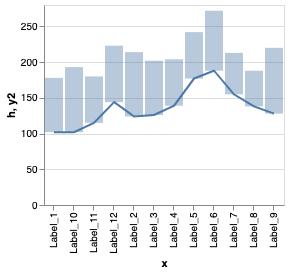

In [61]:
df54 = load_input_table("054.json")

df54["y2"] = df54["h_bar"] + df54["h"]
display(df54)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": {"opacity": 0.4, "type": "bar"},
            "encoding": {
                "y": {"field": "h", "type": "quantitative"},
                "x": { "field": "x", "type": "nominal" },
                "y2": { "field": "y2", "type": "nominal" }
            }
        }, 
        {
            "mark": {"type": "line"},
            "encoding": {
                "y": {"field": "h", "type": "quantitative"},
                "x": { "field": "x", "type": "nominal" }
            }
        }
  ],
  "resolve": {}
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df54)

val1 id val2  a  b
0     A    c  2  2
1     A    d  4  4
2     B    c  2  5
3     B    d  1  2
4     C    c  3  5
5     C    d  2  4
6     D    c  5  4
7     D    d  1  3

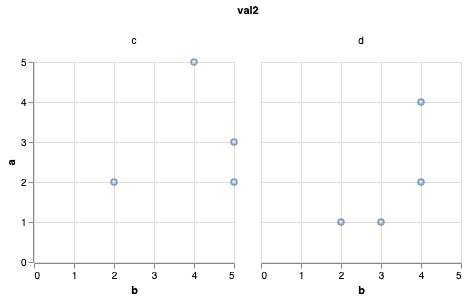

In [62]:
df55 = load_input_table("055.json")

splits = pd.DataFrame(df55["group_measure"].str.split('_', 1).tolist(), columns = ['val1',"val2"])
df55 = pd.concat([df55, splits], axis=1).reset_index()
df55 = df55.pivot_table(index=["id", "val2"], columns='val1', values='value').reset_index()

display(df55)
#print(df55.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "point"},
  "encoding": {
    "y": {"field": "a", "type": "quantitative"},
    "x": { "field": "b", "type": "quantitative" },
    "column": { "field": "val2", "type": "nominal" },
  }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df55)

grp  time variable   value
0     A     1       02   36034
1     B     1       02   63763
2     C     1       02   51432
3     D     1       02   65100
4     E     1       02   61444
..   ..   ...      ...     ...
175   B    12       11  100707
176   C    12       11   53324
177   D    12       11   63296
178   E    12       11   24867
179   F    12       11   21114

[180 rows x 4 columns]

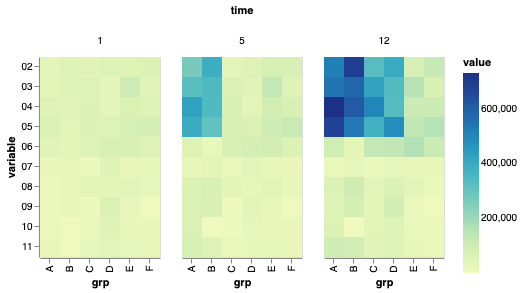

In [63]:
df56 = load_input_table("056.json")

#print(df56)
df56 = pd.melt(df56, id_vars=["grp", "time"], value_vars=["02", "03", "04", "05", "06", "07", "08", "09", "10", "11"])

display(df56)

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "rect"},
  "encoding": {
    "y": {"field": "variable", "type": "nominal"},
    "x": { "field": "grp", "type": "nominal" },
    "column": { "field": "time", "type": "nominal" },
    "color": { "field": "value", "type": "quantitative" },
  }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df56)

#print(json.dumps(wrap_vl_json(spec, df56)))

axis group   g     x      y
0        1   0  10.0   8.04
1        1   1   8.0   6.95
2        1   2  13.0   7.58
3        1   3   9.0   8.81
4        1   4  11.0   8.33
..     ...  ..   ...    ...
39       4   6   8.0   5.25
40       4   7  19.0  12.50
41       4   8   8.0   5.56
42       4   9   8.0   7.91
43       4  10   8.0   6.89

[44 rows x 4 columns]

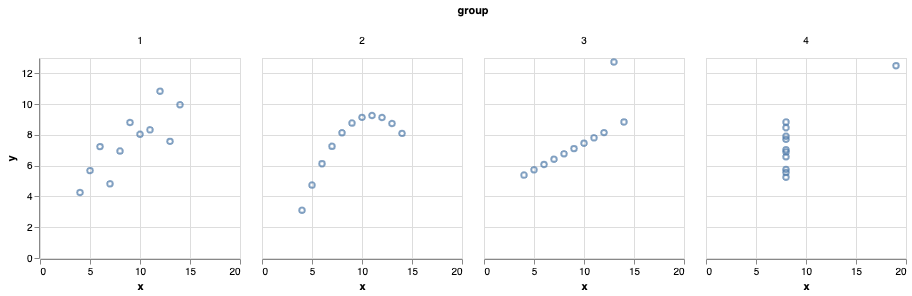

In [64]:
df57 = load_input_table("057.json")

#print(df57)
df57 = pd.melt(df57, id_vars=[], value_vars=["x_1", "x_2", "x_3", "x_4", "y_1", "y_2", "y_3", "y_4"])
splits = pd.DataFrame(df57["variable"].str.split('_', 1).tolist(), columns = ['axis','group'])
df57 = pd.concat([df57, splits], axis=1).reset_index()
df57['g'] = df57.groupby(['axis', "group"])['axis'].cumcount()
df57 = df57.pivot_table(index=["group", "g"], columns='axis', values='value').reset_index()

display(df57)

#print(df57.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "point"},
  "encoding": {
    "x": {"field": "x", "type": "quantitative"},
    "y": { "field": "y", "type": "quantitative" },
    "column": { "field": "group", "type": "nominal" }
  }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df57)

date       type  count   retailer
0   04/17/2018  Completed     12  Retailer1
1   04/17/2018     Missed     13  Retailer1
2   04/17/2018  Completed     10  Retailer2
3   04/19/2018  Completed     10  Retailer1
4   04/19/2018     Missed      1  Retailer1
..         ...        ...    ...        ...
7   04/21/2018  Completed      2  Retailer1
8   04/21/2018  Completed      1  Retailer2
9   04/21/2018     Missed      1  Retailer1
10  04/23/2018  Completed      2  Retailer1
11  04/23/2018     Missed      2  Retailer2

[12 rows x 4 columns]

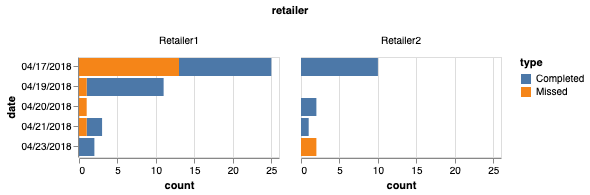

In [65]:
df58 = load_input_table("058.json")
# no transformation

display(df58)
#print(df58.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "bar"},
  "encoding": {
    "x": {"field": "count", "type": "quantitative"},
    "y": { "field": "date", "type": "nominal" },
    "column": { "field": "retailer", "type": "nominal" },
    "color": { "field": "type", "type": "nominal" }
  }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df58)

group ID   time  personsg1  personsg2
0      1   0min          1         10
1      1  10min          4         13
2      1  30min          7         16
3      2   0min          2         11
4      2  10min          5         14
5      2  30min          8         17
6      3   0min          3         12
7      3  10min          6         15
8      3  30min          9         18

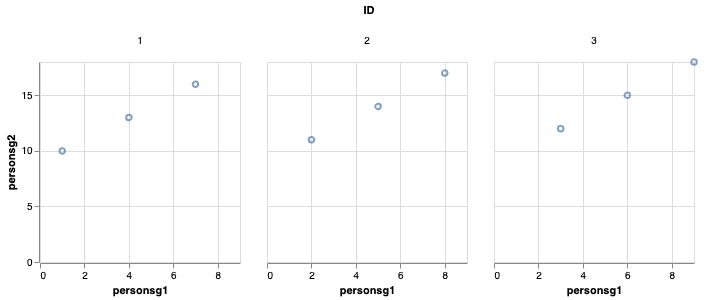

In [66]:
df59 = load_input_table("059.json")

df59 = pd.melt(df59, id_vars=["name", "ID"], 
                value_vars=["personsg1_0min", "personsg1_10min", 
                            "personsg1_30min", "personsg2_0min", 
                            "personsg2_10min", "personsg2_30min"])
split_col = df59["variable"].str.split("_", expand=True)
df59["group"] = split_col[0]
df59["time"] = split_col[1]
df59 = df59.pivot_table(index=["ID", "time"], columns='group', values='value').reset_index()

display(df59)
#print(df59.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "point"},
  "encoding": {
    "x": {"field": "personsg1", "type": "quantitative"},
    "y": { "field": "personsg2", "type": "quantitative" },
    "column": { "field": "ID", "type": "nominal" }
  }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df59)

fac  g  trial1  trial2
0    0  1.0355  1.7138
1    1  1.4998  2.6099
2    2  2.1847  4.3185
3    3  1.0140  2.8532
4    4  1.8388  3.2195
5    5  1.3549  4.4374
6    6  0.9128  2.1362
7    7  1.6856  2.5519
8    8  3.0877  1.2056
9    9  3.2488  2.6400

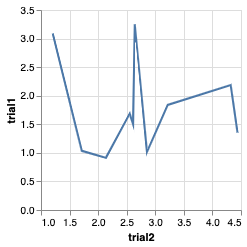

In [67]:
df60 = load_input_table("060.json")

df60['g'] = df60.groupby(['fac'])['score'].cumcount()
df60 = df60.pivot_table(index=["g"], columns='fac', values='score').reset_index()

display(df60)
#print(df60.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "line"},
  "encoding": {
    "x": {"field": "trial2", "type": "quantitative"},
    "y": { "field": "trial1", "type": "quantitative" }
  }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df60)

x variable  value
0    Label_1    bar 1     77
1    Label_2    bar 1     94
2    Label_3    bar 1     79
3    Label_4    bar 1     87
4    Label_5    bar 1     51
..       ...      ...    ...
43   Label_8    bar 0    140
44   Label_9    bar 0    119
45  Label_10    bar 0    113
46  Label_11    bar 0    179
47  Label_12    bar 0    143

[48 rows x 3 columns]

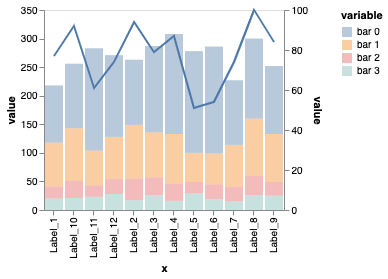

In [68]:
df_t1 = load_input_table("test_1.json")
# https://sites.google.com/site/e90e50fx/home/stacked-bar-chart-with-optional-trendline

df_t1 = pd.melt(df_t1, id_vars='x', value_vars=["bar 1","bar 2", "bar 3", "bar 0"])

display(df_t1)
#print(json.dumps(df_t1.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    
    "layer": [
        {
            "mark": {"opacity": 0.4, "type": "bar"},
            "encoding": {
                "x": { "field": "x", "type": "nominal"},
                "color": { "field": "variable", "type": "nominal"},
                "y": { "field": "value", "type": "quantitative"}
            }
        }, 
        {
            "mark": {"type": "line"},
            "transform": [{"filter": "datum.variable == \"bar 1\""}],
            "encoding": {
                "y": {"type": "quantitative", "field": "value"},
                "x": { "field": "x", "type": "nominal" }
            }
        }
  ],
  "resolve": {"scale": {"y": "independent"}}
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df_t1)

Country variable  value l1  l2
0          Spain      1_1  0.306  1   1
1         France      1_1  0.233  1   1
2             US      1_1  0.185  1   1
3         Greece      1_1  0.323  1   1
4        Belgium      1_1  0.329  1   1
..           ...      ...    ... ..  ..
211      Belgium     2_12  0.672  2  12
212   Costa Rica     2_12  0.496  2  12
213      Germany     2_12  0.026  2  12
214  Switzerland     2_12  0.792  2  12
215      Austria     2_12  0.491  2  12

[216 rows x 5 columns]

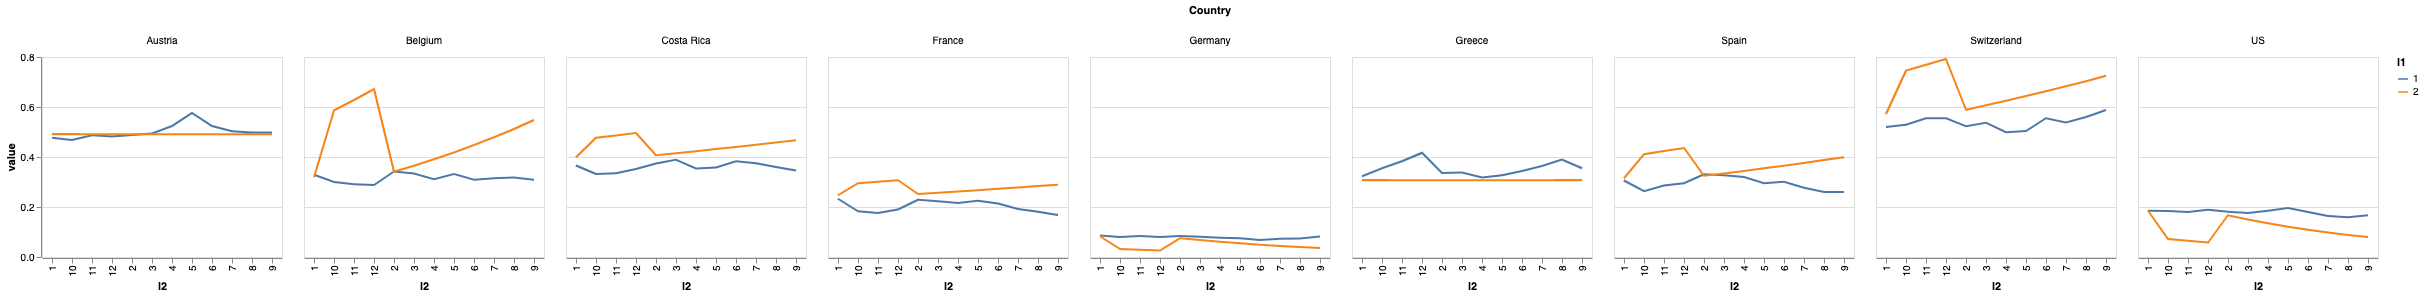

In [69]:
df_t2 = load_input_table("test_2.json")
#https://sites.google.com/site/e90e50fx/home/multiple-lines-chart-step-by-step-guide

df_t2 = pd.melt(df_t2, id_vars='Country', value_vars=["1_1","1_2","1_3","1_4", "1_5","1_6","1_7","1_8","1_9","1_10", "1_11","1_12","2_1","2_2","2_3","2_4","2_5","2_6","2_7", "2_8","2_9", "2_10","2_11","2_12"])
split_col = df_t2["variable"].str.split("_", expand=True)
df_t2["l1"] = split_col[0]
df_t2["l2"] = split_col[1]
df_t2.reset_index()

display(df_t2)
#print(json.dumps(df_t2.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "line",
    "encoding": {
        "x": { "field": "l2", "type": "nominal"},
        "color": { "field": "l1", "type": "nominal"},
        "y": { "field": "value", "type": "quantitative"},
        "column": {"field": "Country", "type": "nominal"}
    }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df_t2)

data  id   diff
0   16   0  False
1   14   1  False
2   12   2  False
3   13   3   True
4   12   4  False
5   16   5   True
6   18   6   True
7   17   7  False
8   12   8  False
9   18   9   True

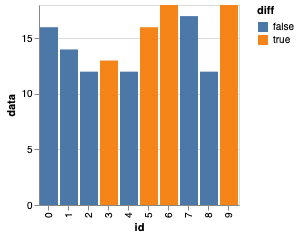

In [70]:
df_t3 = load_input_table("test_3.json")
#https://sites.google.com/site/e90e50fx/home/different-color-for-line-segments-in-excel-charts

df_t3["data"] = [str(d) for d in df_t3["data"]]
df_t3["id"] = [int(x) for x in df_t3.index]

df_t3["diff"] = df_t3["data"] > df_t3["data"].shift(1)

display(df_t3)
#print(json.dumps(df_t3.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "x": { "field": "id", "type": "nominal"},
        "color": { "field": "diff", "type": "nominal"},
        "y": { "field": "data", "type": "quantitative"},
        "order": {"field": "id"}
    }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df_t3)

Period    variable  value
0        1  APPRENTICE    8.8
1        2  APPRENTICE    4.2
2        3  APPRENTICE    1.0
3        4  APPRENTICE    1.0
4        5  APPRENTICE    0.0
..     ...         ...    ...
85       6       MISC.    1.8
86       7       MISC.    4.4
87       8       MISC.    5.6
88       9       MISC.    4.5
89      10       MISC.    0.0

[90 rows x 3 columns]

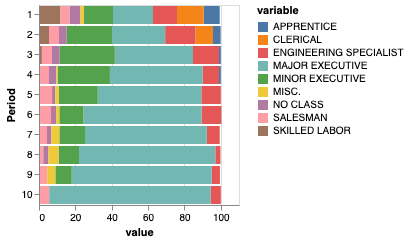

In [71]:
#https://sites.google.com/site/e90e50fx/home/vintage-charts-in-excel-bar-chart-with-highlight
df_t4 = load_input_table("test_4.json")

df_t4 = pd.melt(df_t4, id_vars='Period', value_vars=["APPRENTICE","CLERICAL","ENGINEERING SPECIALIST","MAJOR EXECUTIVE","SKILLED LABOR","MINOR EXECUTIVE","SALESMAN","NO CLASS","MISC."])

display(df_t4)
#print(json.dumps(df_t4.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "x": { "field": "value", "type": "quantitative"},
        "color": { "field": "variable", "type": "nominal"},
        "y": { "field": "Period", "type": "nominal"}
    }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df_t4)

id variable  value
0    1    cat 1  49554
1    2    cat 1  15787
2    3    cat 1   2525
3    4    cat 1   1678
4    5    cat 1   1514
..  ..      ...    ...
7    8      sum  -2891
8    9      sum  -7117
9   10      sum -19316
10  11      sum -33501
11  12      sum -44379

[84 rows x 3 columns]

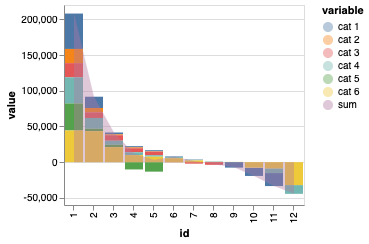

In [72]:
#https://sites.google.com/site/e90e50fx/home/visualize-underlying-parts-and-total-value-using-column-chart
df_t5 = load_input_table("test_5.json")

df_t5 = pd.melt(df_t5, id_vars='id', value_vars=["cat 1", "cat 2", "cat 3", "cat 4", "cat 5", "cat 6"])
df_t5_1 = df_t5.groupby(['id'])["value"].sum().reset_index()
df_t5 = pd.concat([df_t5, df_t5_1], sort=False)
df_t5 = df_t5.fillna("sum")

display(df_t5)
#print(json.dumps(df_t5.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": {"type": "bar"},
            "transform": [{"filter": "datum.variable != \"sum\""}],
            "encoding": {
                "y": { "field": "value", "type": "quantitative"},
                "color": { "field": "variable", "type": "nominal"},
                "x": { "field": "id", "type": "nominal"}
            }
        },
        {
            "mark": {"opacity": 0.4, "type": "area"},
            "transform": [{"filter": "datum.variable == \"sum\""}],
            "encoding": {
                "y": {"type": "quantitative", "field": "value"},
                "color": { "field": "variable", "type": "nominal"},
                "x": { "field": "id", "type": "nominal" }
            }
        }
  ]
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df_t5)

time  Passengers                          Station variable  value
0     5:00          12  Deák tér - Bajcsi-Zsilinszky út      500     12
1     6:00         212  Deák tér - Bajcsi-Zsilinszky út      500    212
2     7:00         530  Deák tér - Bajcsi-Zsilinszky út      500    530
3     8:00        1578  Deák tér - Bajcsi-Zsilinszky út      500   1578
4     9:00        1662  Deák tér - Bajcsi-Zsilinszky út      500   1662
..     ...         ...                              ...      ...    ...
195  20:00         221        Vörösmarty tér - Deák tér     2500  -1779
196  21:00         149        Vörösmarty tér - Deák tér     2500  -1851
197  22:00         121        Vörösmarty tér - Deák tér     2500  -1879
198  23:00          67        Vörösmarty tér - Deák tér     2500  -1933
199   0:00          30        Vörösmarty tér - Deák tér     2500  -1970

[200 rows x 5 columns]

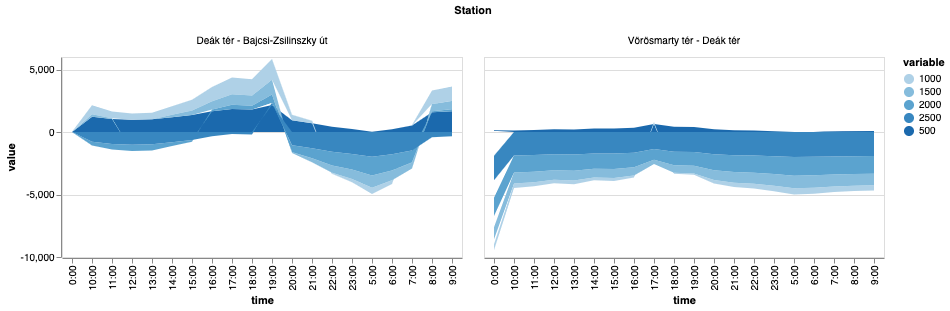

In [73]:
#https://sites.google.com/site/e90e50fx/home/area-chart-with-levels-excel-croissant
df_t6 = load_input_table("test_6.json")

df_t6 = pd.melt(df_t6, id_vars=['time', "Passengers", "Station"], value_vars=["500", "1000","1500","2000","2500"])

display(df_t6)
#print(json.dumps(df_t6.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"type": "area"},
    "encoding": {
        "x": { "field": "time", "type": "nominal"},
        "color": { "field": "variable", "type": "ordinal"},
        "y": { "field": "value", "type": "quantitative"},
        "column": { "field": "Station", "type": "nominal"}
    }
 
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df_t6)

name  category       sport  priority  highlight
0    Mister_1  Freshman      Basket         1      False
1    Mister_3  Freshman      Basket         1      False
2    Mister_4  Freshman      Basket         1      False
3    Mister_5  Freshman    Climbing         1      False
4    Mister_6  Freshman    Climbing         1      False
..        ...       ...         ...       ...        ...
63  Mister_24   Seniors    Swimming         2      False
64  Mister_25   Seniors    Swimming         2      False
65  Mister_22   Seniors  Volleyball         3      False
66  Mister_23   Seniors  Volleyball         3      False
67  Mister_24   Seniors  Volleyball         3      False

[68 rows x 5 columns]

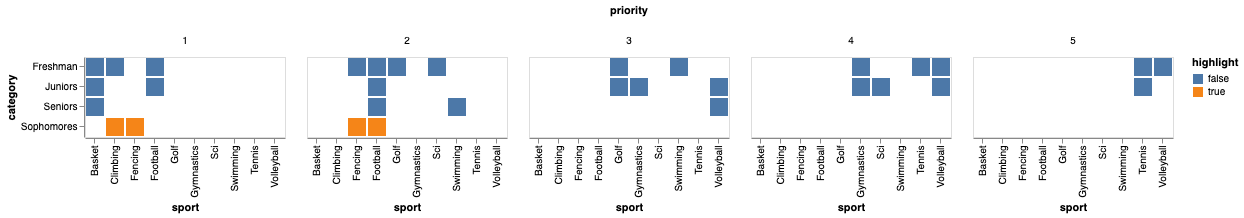

In [74]:
# https://sites.google.com/site/e90e50charts/
df_t7 = load_input_table("test_7.json")

df_t7["highlight"] = df_t7["category"] == "Sophomores"

display(df_t7)
#print(json.dumps(df_t7.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"type": "bar"},
    "encoding": {
        "x": { "field": "sport", "type": "nominal"},
        "color": { "field": "highlight", "type": "nominal"},
        "y": { "field": "category", "type": "nominal"},
        "column": { "field": "priority", "type": "nominal"}
    }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df_t7)

id  ageFrom  ageTo  qt  range   label
0  valore1        0     10   5     10    0_10
1  valore2       10     15  12      5   10_15
2  valore3       15     30  74     15   15_30
3  valore4       30     40  12     10   30_40
4  valore5       40     99   8     59   40_99
5  valore6       99    120  15     21  99_120

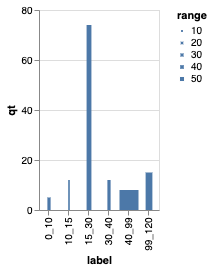

In [75]:
# https://sites.google.com/site/e90e50charts/
df_t8 = load_input_table("test_8.json")

df_t8["range"] = df_t8["ageTo"] - df_t8["ageFrom"]
df_t8["label"] = [str(x) + "_" + str(df_t8["ageTo"][i]) for i, x in enumerate(df_t8["ageFrom"])] 

display(df_t8)
#print(json.dumps(df_t8.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"type": "bar"},
    "encoding": {
        "x": { "field": "label", "type": "ordinal"},
        "size": { "field": "range", "type": "quantitative"},
        "y": { "field": "qt", "type": "quantitative"},
    }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df_t8)

Group   Venditor variable  value
0   Group_1   Vendor_1   2010-1    813
1   Group_1   Vendor_2   2010-1    242
2   Group_1   Vendor_3   2010-1    258
3   Group_2   Vendor_4   2010-1    903
4   Group_2   Vendor_5   2010-1    339
..      ...        ...      ...    ...
85  Group_2   Vendor_6   2012-1    507
86  Group_2   Vendor_7   2012-1    781
87  Group_3   Vendor_8   2012-1    674
88  Group_3   Vendor_9   2012-1    878
89  Group_3  Vendor_10   2012-1    595

[90 rows x 4 columns]

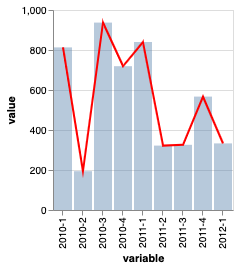

In [76]:
# https://sites.google.com/site/e90e50fx/home/Dynamic-chart-with-dynamic-title-based-on-active-cell-without-VBA
df_t9 = load_input_table("test_9.json")
df_t9 = pd.melt(df_t9, id_vars=["Group", "Venditor"], value_vars=["2010-1", "2010-2", "2010-3", "2010-4", "2011-1", "2011-2", "2011-3", "2011-4", "2012-1"])

display(df_t9)
#print(json.dumps(df_t9.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": {"opacity": 0.4, "type": "bar"},
            "transform": [{"filter": "datum.Venditor == \"Vendor_1\""}],
            "encoding": {
                "y": {"field": "value", "type": "quantitative"},
                "x": { "field": "variable", "type": "ordinal" }
            }
        }, 
        {
            "mark": {"type": "line", "stroke": "red"},
            "transform": [{"filter": "datum.Venditor == \"Vendor_1\""}],
            "encoding": {
                "y": {"field": "value", "type": "quantitative"},
                "x": { "field": "variable", "type": "ordinal" }
            }
        }
  ]
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df_t9)

Group   Venditor variable  value              label
0   Group_1   Vendor_1   2010-1    813   Group_1_Vendor_1
1   Group_1   Vendor_2   2010-1    242   Group_1_Vendor_2
2   Group_1   Vendor_3   2010-1    258   Group_1_Vendor_3
3   Group_2   Vendor_4   2010-1    903   Group_2_Vendor_4
4   Group_2   Vendor_5   2010-1    339   Group_2_Vendor_5
..      ...        ...      ...    ...                ...
85  Group_2   Vendor_6   2012-1    507   Group_2_Vendor_6
86  Group_2   Vendor_7   2012-1    781   Group_2_Vendor_7
87  Group_3   Vendor_8   2012-1    674   Group_3_Vendor_8
88  Group_3   Vendor_9   2012-1    878   Group_3_Vendor_9
89  Group_3  Vendor_10   2012-1    595  Group_3_Vendor_10

[90 rows x 5 columns]

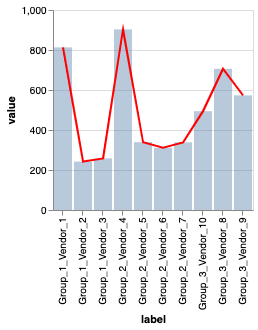

In [77]:
# https://sites.google.com/site/e90e50fx/home/Dynamic-chart-with-dynamic-title-based-on-active-cell-without-VBA
df_t10 = load_input_table("test_10.json")
df_t10 = pd.melt(df_t10, id_vars=["Group", "Venditor"], value_vars=["2010-1", "2010-2", "2010-3", "2010-4", "2011-1", "2011-2", "2011-3", "2011-4", "2012-1"])
df_t10["label"] = df_t10["Group"] + "_" + df_t10["Venditor"]

display(df_t10)
#print(json.dumps(df_t10.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": {"opacity": 0.4, "type": "bar"},
            "transform": [{"filter": "datum.variable == \"2010-1\""}],
            "encoding": {
                "y": {"field": "value", "type": "quantitative"},
                "x": { "field": "label", "type": "ordinal" }
            }
        }, 
        {
            "mark": {"type": "line", "stroke": "red"},
            "transform": [{"filter": "datum.variable == \"2010-1\""}],
            "encoding": {
                "y": {"field": "value", "type": "quantitative"},
                "x": { "field": "label", "type": "ordinal" }
            }
        }
  ]
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df_t10)

Group  Venditor variable  value  cumsum
0  Group_1  Vendor_1   2010-1    813     813
1  Group_1  Vendor_1   2010-2    194    1007
2  Group_1  Vendor_1   2010-3    937    1944
3  Group_1  Vendor_1   2010-4    719    2663
4  Group_1  Vendor_1   2011-1    840    3503
5  Group_1  Vendor_1   2011-2    322    3825
6  Group_1  Vendor_1   2011-3    326    4151
7  Group_1  Vendor_1   2011-4    567    4718
8  Group_1  Vendor_1   2012-1    333    5051

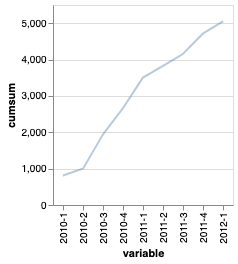

In [78]:
# https://sites.google.com/site/e90e50fx/home/Dynamic-chart-with-dynamic-title-based-on-active-cell-without-VBA
df_t11 = load_input_table("test_11.json")
df_t11 = pd.melt(df_t11, id_vars=["Group", "Venditor"], value_vars=["2010-1", "2010-2", "2010-3", "2010-4", "2011-1", "2011-2", "2011-3", "2011-4", "2012-1"])
df_t11['cumsum'] = df_t11.groupby("Venditor")['value'].transform(pd.Series.cumsum)

display(df_t11)
#print(json.dumps(df_t11.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"opacity": 0.4, "type": "line"},
    "encoding": {
        "y": {"field": "cumsum", "type": "quantitative"},
        "x": { "field": "variable", "type": "ordinal" }
    }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df_t11)

Quarter     variable  value
0       Q1  CATEGORIA_1     19
1       Q2  CATEGORIA_1     41
2       Q3  CATEGORIA_1     25
3       Q4  CATEGORIA_1     47
4       Q1  CATEGORIA_2     26
..     ...          ...    ...
11      Q4  CATEGORIA_3     41
0       Q1          sum     79
1       Q2          sum    119
2       Q3          sum     76
3       Q4          sum    123

[16 rows x 3 columns]

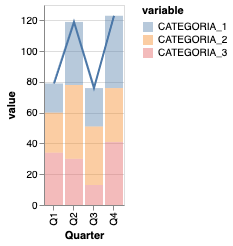

In [79]:
#https://sites.google.com/site/e90e50fx/home/visualizepartsandwhole-combineclusteredcolumnandstackedcolumncharts
df_t12 = load_input_table("test_12.json")
df_t12 = pd.melt(df_t12, id_vars=["Quarter"], value_vars=["CATEGORIA_1", "CATEGORIA_2", "CATEGORIA_3"])
df_t12_1 = df_t12.groupby(["Quarter"])['value'].sum().reset_index()
df_t12 = pd.concat([df_t12, df_t12_1], sort=False)
df_t12 = df_t12.fillna("sum")

display(df_t12)
#print(json.dumps(df_t12.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": {"opacity": 0.4, "type": "bar"},
            "transform": [{"filter": "datum.variable != \"sum\""}],
            "encoding": {
                "y": {"field": "value", "type": "quantitative"},
                "x": { "field": "Quarter", "type": "ordinal" },
                "color": {"field": "variable", "type": "nominal"}
            }
        }, 
        {
            "mark": {"type": "line"},
            "transform": [{"filter": "datum.variable == \"sum\""}],
            "encoding": {
                "y": {"field": "value", "type": "quantitative"},
                "x": { "field": "Quarter", "type": "ordinal" }
            }
        }
  ]
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df_t12)

Title  year  variable  value  \
0       Financial Accounting Assistant Manager  2003  MS Excel      0   
1       Financial Accounting Assistant Manager  2004  MS Excel      1   
2      Management Accounting Assistant Manager  2005  MS Excel      2   
3      Management Accounting Assistant Manager  2006  MS Excel      3   
4   Indirect Controlling and Reporting Analyst  2007  MS Excel      5   
..                                         ...   ...       ...    ...   
45  Indirect Controlling and Reporting Analyst  2008       SAP      4   
46  Indirect Controlling and Reporting Analyst  2009       SAP      4   
47  Indirect Controlling and Reporting Analyst  2010       SAP      4   
48                  Finance Operations Analyst  2011       SAP      4   
49                  Finance Operations Analyst  2012       SAP      4   

                                              label  
0       2003_Financial Accounting Assistant Manager  
1       2004_Financial Accounting Assistant Manager  
2      2005_Management Accounting Assistant Manager  
3      2006_Management Accounting Assistant Manager  
4   2007_Indirect Controlling and Reporting Analyst  
..                                              ...  
45  2008_Indirect Controlling and Reporting Analyst  
46  2009_Indirect Controlling and Reporting Analyst  
47  2010_Indirect Controlling and Reporting Analyst  
48                  2011_Finance Operations Analyst  
49                  2012_Finance Operations Analyst  

[50 rows x 5 columns]

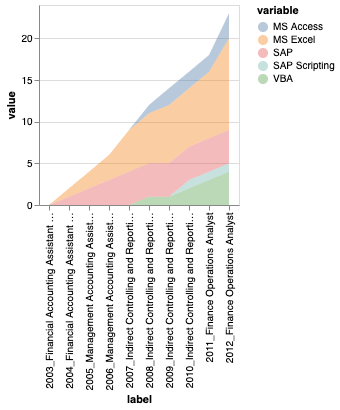

In [80]:
#https://sites.google.com/site/e90e50fx/home/creative-and-advanced-chart-design-in-excel#TOC-Cherry
df_t13 = load_input_table("test_13.json")
df_t13 = pd.melt(df_t13, id_vars=["Title", "year"], value_vars=["MS Excel", "MS Access", "VBA", "SAP Scripting", "SAP"])
df_t13["label"] = df_t13["year"].astype(str) + "_" + df_t13["Title"]

display(df_t13)
#print(json.dumps(df_t13.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"opacity": 0.4, "type": "area"},
    "encoding": {
        "y": {"field": "value", "type": "quantitative"},
        "x": { "field": "label", "type": "ordinal" },
        "color": {"field": "variable", "type": "nominal"}
    }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df_t13)

title variable  value
0               Preparing monthly forecast     work     20
1         Margin and Product cost analysis     work     15
2             Excel and Access development     work     10
3                          Excel trainings     work      5
4                                Beadworks     work     50
..                                     ...      ...    ...
11                         Excel trainings    hobby     50
12                               Beadworks    hobby      8
13                                  Sewing    hobby      9
14                     Fiddling with Excel    hobby     18
15  Managing Excel Hero group on Linked In    hobby     16

[16 rows x 3 columns]

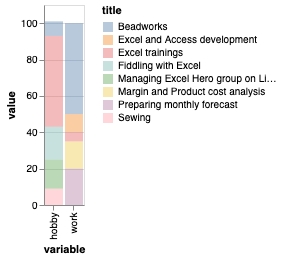

In [81]:
#https://sites.google.com/site/e90e50fx/home/creative-and-advanced-chart-design-in-excel#TOC-Cherry
df_t14 = load_input_table("test_14.json")
df_t14 = pd.melt(df_t14, id_vars=["title"], value_vars=["work", "hobby"])

display(df_t14)
#print(json.dumps(df_t14.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"opacity": 0.4, "type": "bar"},
    "encoding": {
        "y": {"field": "value", "type": "quantitative"},
        "x": { "field": "variable", "type": "nominal" },
        "color": {"field": "title", "type": "nominal"}
    }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df_t14)

Age    variable  value
0    0-18  FEMALE 37%      3
1   18-24  FEMALE 37%      8
2   25-34  FEMALE 37%     13
3   35-44  FEMALE 37%      5
4   24-54  FEMALE 37%      5
..    ...         ...    ...
7   18-24    MALE 63%     15
8   25-34    MALE 63%     22
9   35-44    MALE 63%     10
10  24-54    MALE 63%      6
11    55+    MALE 63%      4

[12 rows x 3 columns]

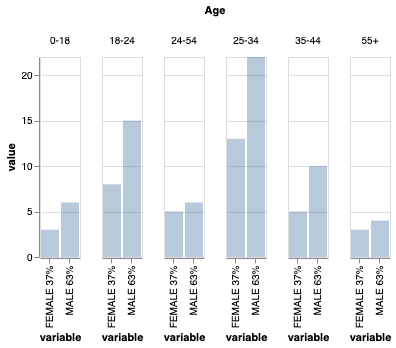

In [82]:
#https://sites.google.com/site/e90e50fx/home/creative-and-advanced-chart-design-in-excel#TOC-Cherry
df_t15 = load_input_table("test_15.json")
df_t15 = pd.melt(df_t15, id_vars=["Age"], value_vars=["FEMALE 37%", "MALE 63%"])

display(df_t15)
#print(json.dumps(df_t15.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"opacity": 0.4, "type": "bar"},
    "encoding": {
        "y": {"field": "value", "type": "quantitative"},
        "x": { "field": "variable", "type": "nominal" },
        "column": {"field": "Age", "type": "nominal"}
    }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df_t15)

label  variable  value
0    lbl_1  mutate_a     85
1    lbl_2  mutate_a     26
2    lbl_3  mutate_a     68
3    lbl_4  mutate_a     93
4    lbl_5  mutate_a     83
..     ...       ...    ...
37  lbl_17    values     34
38  lbl_18    values     36
39  lbl_19    values     60
40  lbl_20    values     62
41  lbl_21    values     96

[42 rows x 3 columns]

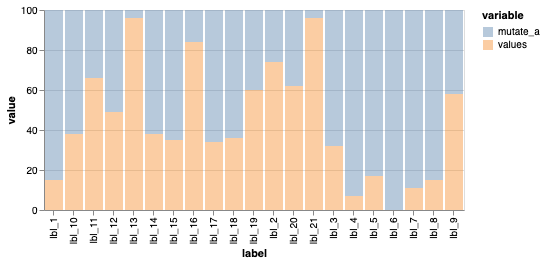

In [83]:
#https://sites.google.com/site/e90e50charts/
df_t16 = load_input_table("test_16.json")
df_t16["mutate_a"] = df_t16["total"] - df_t16["values"]
df_t16 = pd.melt(df_t16, id_vars=["label"], value_vars=["mutate_a", "values"])

display(df_t16)
#print(json.dumps(df_t16.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"opacity": 0.4, "type": "bar"},
    "encoding": {
        "y": {"field": "value", "type": "quantitative"},
        "x": { "field": "label", "type": "nominal" },
        "color": {"field": "variable", "type": "nominal"}
    }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df_t16)

From  Total variable  value
0       YAHOO    100    APPLE    7.6
1   MICROSOFT    100    APPLE    5.0
2      GOOGLE    100    APPLE    0.0
3       APPLE    100    APPLE    0.0
4    LINKEDIN    100    APPLE    1.0
..        ...    ...      ...    ...
31  MICROSOFT    100    YAHOO    0.0
32     GOOGLE    100    YAHOO    0.0
33      APPLE    100    YAHOO    0.0
34   LINKEDIN    100    YAHOO    0.0
35   FACEBOOK    100    YAHOO    0.0

[36 rows x 4 columns]

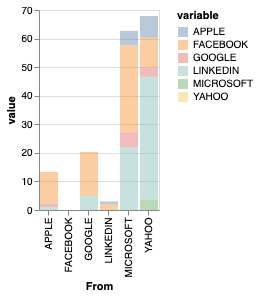

In [84]:
#https://sites.google.com/site/e90e50fx/home/talent-traffic-chart-with-chord-diagram-in-excel
df_t17 = load_input_table("test_17.json")
df_t17 = pd.melt(df_t17, id_vars=["From", "Total"], value_vars=["APPLE", "FACEBOOK", "GOOGLE", "LINKEDIN", "MICROSOFT", "YAHOO"])

display(df_t17)
#print(json.dumps(df_t17.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"opacity": 0.4, "type": "bar"},
    "encoding": {
        "y": {"field": "value", "type": "quantitative"},
        "x": { "field": "From", "type": "nominal" },
        "color": {"field": "variable", "type": "nominal"}
    }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df_t17)

label variable  value
0       1   int x1   0.00
1       2   int x1   0.00
2       3   int x1  25.93
3       4   int x1  26.33
4       5   int x1  27.08
..    ...      ...    ...
59      4       y2  30.00
60      5       y2  58.00
61      6       y2  77.00
62      7       y2  70.00
63      8       y2  58.00

[64 rows x 3 columns]

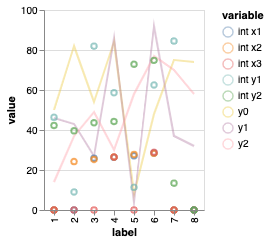

In [85]:
#https://sites.google.com/site/e90e50/user/grafici-a-dispersione-excel-griglia-valori
df_t18 = load_input_table("test_18.json")
df_t18 = pd.melt(df_t18, id_vars=["label"], value_vars=["int x1", "int x2", "int x3", "int y1", "int y2", "y0", "y1", "y2"])
display(df_t18)
#print(json.dumps(df_t18.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": {"opacity": 0.4, "type": "line"},
            "transform": [{"filter": "datum.variable == \"y0\" || datum.variable == \"y1\" || datum.variable == \"y2\""}],
            "encoding": {
                "y": {"field": "value", "type": "quantitative"},
                "x": { "field": "label", "type": "ordinal" },
                "color": {"field": "variable", "type": "nominal"}
            }
        }, 
        {
            "mark": {"type": "point"},
            "transform": [{"filter": "datum.variable != \"y0\" && datum.variable != \"y1\" && datum.variable != \"y2\""}],
            "encoding": {
                "y": {"field": "value", "type": "quantitative"},
                "x": { "field": "label", "type": "ordinal" },
                "color": {"field": "variable", "type": "nominal"}
            }
        }
  ]
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df_t18)

Product  Profit %  Sales growth        variable  value
0    Prod1        42             6  Sales Increase     29
1    Prod2        48             1  Sales Increase     18
2    Prod3        10            -3  Sales Increase      7
3    Prod4        16            15  Sales Increase     11
4    Prod5        10            -6  Sales Increase      2
..     ...       ...           ...             ...    ...
21   Prod9        30            -4        mutate_a      3
22  Prod10        12            15        mutate_a     25
23  Prod11        55            25        mutate_a     28
24  Prod12        18            18        mutate_a     26
25  Prod13        15            19        mutate_a     33

[26 rows x 5 columns]

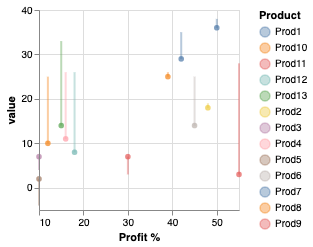

In [86]:
#https://sites.google.com/site/e90e50fx/home/creative-and-advanced-chart-design-in-excel#TOC-Cherry
df_t19 = load_input_table("test_19.json")

df_t19["mutate_a"] = df_t19["Sales Increase"] + df_t19["Sales growth"]
df_t19 = pd.melt(df_t19, id_vars=["Product", "Profit %", "Sales growth"], value_vars=["Sales Increase", "mutate_a"])

display(df_t19)
#print(json.dumps(df_t19.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
       {
            "mark": {"opacity": 0.4, "type": "line"},
            "encoding": {
                "y": {"field": "value", "type": "quantitative"},
                "x": { "field": "Profit %", "type": "quantitative" },
                "color": {"field": "Product", "type": "nominal"}
            }
       }, 
        {
            "mark": {"type": "circle"},
            "transform": [{"filter": "datum.variable == \"Sales Increase\""}],
            "encoding": {
                "y": {"field": "value", "type": "quantitative"},
                "x": { "field": "Profit %", "type": "quantitative" },
                "color": {"field": "Product", "type": "nominal"}
            }
        }
  ]
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df_t19)

Country Name                       Region variable  value
78                Argentina  Latin America and Caribbean     1960  68.10
79                    Aruba  Latin America and Caribbean     1960  67.12
80             Bahamas, The  Latin America and Caribbean     1960  65.62
81                 Barbados  Latin America and Caribbean     1960  66.94
82                   Belize  Latin America and Caribbean     1960  62.01
...                     ...                          ...      ...    ...
9643               Suriname  Latin America and Caribbean     2011  73.89
9644    Trinidad and Tobago  Latin America and Caribbean     2011  73.53
9645                Uruguay  Latin America and Caribbean     2011  80.10
9646          Venezuela, RB  Latin America and Caribbean     2011  77.37
9647  Virgin Islands (U.S.)  Latin America and Caribbean     2011  82.41

[1716 rows x 4 columns]

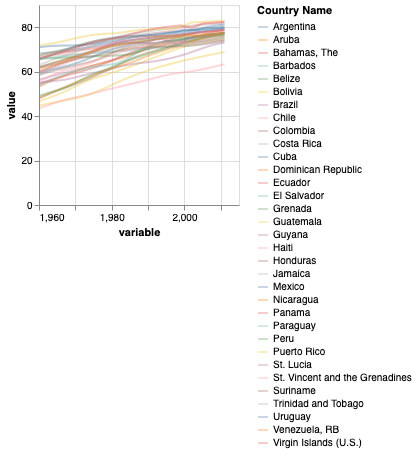

In [87]:
#https://sites.google.com/site/e90e50fx/home/life-expectancy-by-nathan-yau-chart-with-excel
df_t20 = load_input_table("test_20.json")

df_t20 = pd.melt(df_t20, id_vars=["Country Name", "Region"], value_vars=["1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011"])
df_t20 = df_t20[df_t20["Region"] == "Latin America and Caribbean"]

display(df_t20)
#print(json.dumps(df_t20.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"opacity": 0.4, "type": "line"},
    "encoding": {
        "y": {"field": "value", "type": "quantitative"},
        "x": { "field": "variable", "type": "quantitative" },
        "color": {"field": "Country Name", "type": "nominal"}
    }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df_t20)

Country Name      Date         Type month day
0       Bangladesh    1/5/14  Legislative     1   5
1            Egypt   1/14/14   Referendum     1  14
2       Costa Rica    2/2/14    President     2   2
3       Costa Rica    2/2/14  Legislative     2   2
4      El Salvador    2/2/14    President     2   2
..             ...       ...          ...   ...  ..
55  American Samoa   11/4/14  Legislative    11   4
56            Guam   11/4/14  Legislative    11   4
57   United States   11/4/14  Legislative    11   4
58       Catalonia   11/9/14   Referendum    11   9
59           Tonga  11/25/14  Legislative    11  25

[60 rows x 5 columns]

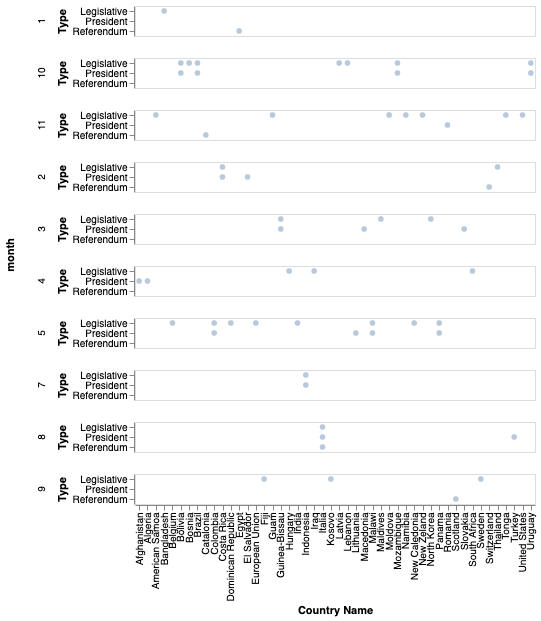

In [88]:
#https://chandoo.org/wp/world-polls-chart-revisited/
df_t21 = load_input_table("test_21.json")
split_col = df_t21["Date"].str.split("/", expand=True)
df_t21["month"] = split_col[0]
df_t21["day"] = split_col[1]

display(df_t21)
#print(json.dumps(df_t21.to_dict(orient="records")))

spec = {
    "height": 30,
    "width": 400,
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"opacity": 0.4, "type": "circle"},
    "encoding": {
        #"size": { "field": "day", "type": "quantitative" },
        "x" : {"field": "Country Name", "type": "nominal"},
        "y": {"field": "Type", "type": "nominal"},
        "row": {"field": "month", "type": "nominal"}
    }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df_t21)

prod  year variable  value
0   Product1  2011       Q1     10
1   Product2  2011       Q1      2
2   Product3  2011       Q1      7
3   Product4  2011       Q1      1
4   Product5  2011       Q1      6
..       ...   ...      ...    ...
67  Product2  2013       Q4      8
68  Product3  2013       Q4      9
69  Product4  2013       Q4      5
70  Product5  2013       Q4      1
71  Product6  2013       Q4      8

[72 rows x 4 columns]

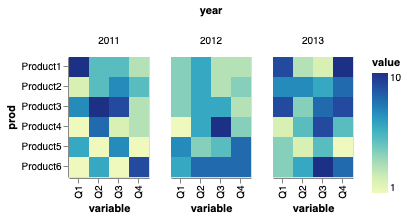

In [89]:
#https://www.myonlinetraininghub.com/excel-3d-financial-reports
df_t22 = load_input_table("test_22.json")

split_col = df_t22["product"].str.split("_", expand=True)
df_t22["prod"] = split_col[0]
df_t22["year"] = split_col[1]
df_t22 = pd.melt(df_t22, id_vars=["prod", "year"], value_vars=["Q1", "Q2", "Q3", "Q4"])

display(df_t22)
#print(json.dumps(df_t22.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"opacity": 1, "type": "rect"},
    "encoding": {
        "color": { "field": "value", "type": "quantitative" },
        "x" : {"field": "variable", "type": "nominal"},
        "y": {"field": "prod", "type": "nominal"},
        "column": {"field": "year", "type": "nominal"}
    }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df_t22)

year variable  value
0   2011       Q1     27
1   2011       Q2     35
2   2011       Q3     31
3   2011       Q4     24
4   2012       Q1     26
..   ...      ...    ...
7   2012       Q4     30
8   2013       Q1     35
9   2013       Q2     27
10  2013       Q3     40
11  2013       Q4     41

[12 rows x 3 columns]

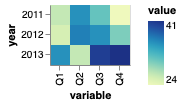

In [90]:
#https://www.myonlinetraininghub.com/excel-3d-financial-reports
df_t23 = load_input_table("test_23.json")

df_t23 = pd.melt(df_t23, id_vars=["year", "product"], value_vars=["Q1", "Q2", "Q3", "Q4"])
df_t23 = df_t23.groupby(['year', "variable"])["value"].sum().reset_index()

display(df_t23)
#print(json.dumps(df_t23.to_dict(orient="records")))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"opacity": 1, "type": "rect"},
    "encoding": {
        "color": { "field": "value", "type": "quantitative" },
        "x" : {"field": "variable", "type": "nominal"},
        "y": {"field": "year", "type": "nominal"}
    }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df_t23)

In [91]:
# unsolvable cases:
# https://sites.google.com/site/e90e50fx/home/broken-line-panel-charts

In [92]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
df = load_input_table("027-matplotlib.json")
df = pd.melt(df, id_vars=['Period'], value_vars=["00", "01", "02", "03", "04", '05', '06'])


spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "line",
    "encoding": {
        "x": { "field": "variable", "type": "nominal"},
        "y": { "field": "value", "type": "quantitative"},
        "color": { "field": "Period", "type": "nominal"},
    }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df).display()

df = df.pivot(index='variable',columns='Period', values='value').reset_index()
#df = df[df["Period"]<= 6]

display(df)

df.plot.line(x="variable")

plt.savefig('myfile.pdf')
#print(json.dumps(df27.to_dict(orient="records")))



FileNotFoundError: [Errno 2] No such file or directory: '../../benchmarks/027-matplotlib.json'